# VACCINE PREDICTION

**MADE BY TEAM ID: PTID-CDS-JUL22-1339**

**PROJECT ID: PRCP-1014-VaccinePred**

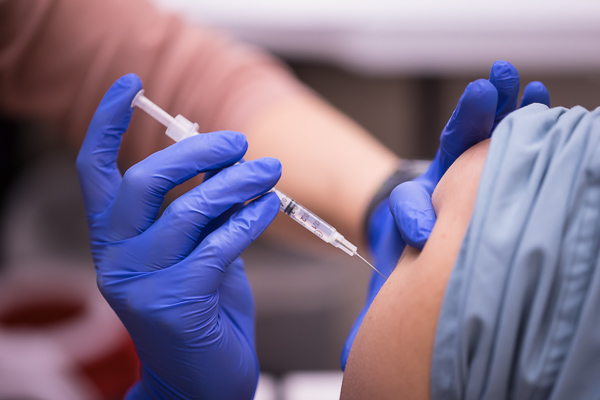

## BUSINESS CASE - To predict how likely individuals are to receive their H1N1 and seasonal flu vaccines.

This notebook contains various ML Models which will be able to predict the posibility of receiving H1N1 and seasonal flu to peoples.

Pipline of this Model Building :-
- Problem Defination
* Domain analysis
* Basic checks
* EDA
* DATA preprocessing
* Model creation for h1n1 vaccine
* Feature selection
* Model selection
* Hyperparameter tuning
* Model Evaluation
* Model creation for seasonal vaccine
* Feature selection
* Model selection
* Hyperparameter tuning
* Model Evaluation
* Conclusion

# 1] PROBLEM DEFINATION
- Predict the two probabilities: one for h1n1_vaccine and one for seasonal_vaccine.
- Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey.

# IMPORTING NECESSORY MODULES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,f1_score

In [3]:
data1 = pd.read_csv('E:/Data mites/INTERNSHIP DETAILS/PRCP-1014-VaccinePred/Data/features.csv')
data2 = pd.read_csv('E:/Data mites/INTERNSHIP DETAILS/PRCP-1014-VaccinePred/Data/labels.csv')

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
data1.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [6]:
data2.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [7]:
data = pd.concat([data2,data1],axis=1)

In [8]:
data

,respondent_id,h1n1_vaccine,seasonal_vaccine,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,0,0,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,0,0,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,0,1,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,0,0,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


# 2] DOMAIN ANALYSIS

- **respondent_id** - This is unique column for each row.
- **h1n1_concern** - Level of concern about the H1N1 flu.| 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat         concerned; 3 = Very concerned.
- **h1n1_knowledge** - Level of knowledge about H1N1 flu.|0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
- **behavioral_antiviral_meds** - Has taken antiviral medications or not.
- **behavioral_avoidance** - Has avoided close contact with others with flu-like symptoms or not.
- **behavioral_face_mask** - Has bought a face mask or not.
- **behavioral_wash_hands** - Has frequently washed hands or used hand sanitizer or not.
- **behavioral_large_gatherings** - Has reduced time at large gatherings or not.
- **behavioral_outside_home**- Has reduced contact with people outside of own household or not.
- **behavioral_touch_face** - Has avoided touching eyes, nose, or mouth
- **doctor_recc_h1n1** - H1N1 flu vaccine was recommended by doctor or not.
- **doctor_recc_seasona** - Seasonal flu vaccine was recommended by doctor or not.
- **chronic_med_condition** - Has any other chronic medical conditions or not.
- **child_under_6_months** - Has regular close contact with a child under the age of six months or not.
- **health_worker**	- Is a healthcare worker or not.
- **health_insurance**	- Has health insurance or not.
- **opinion_h1n1_vacc_effective** - Respondent's opinion about H1N1 vaccine effectiveness.|1 = Not at all effective; 2 = Not very     effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- **opinion_h1n1_risk**	- Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.|1 = Very Low; 2 = Somewhat   low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- **opinion_h1n1_sick_from_vacc** - Respondent's worry of getting sick from taking H1N1 vaccine.|1 = Not at all worried; 2 = Not       very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- **opinion_seas_vacc_effective** - Respondent's opinion about seasonal flu vaccine effectiveness.|1 = Not at all effective; 2 = Not   very effective; 3 - Don't know; 4 = Somewhat effective; 5 = Very effective.
- **opinion_seas_risk** - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.|1 = Very Low; 2 =         Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- **opinion_seas_sick_from_vacc** - Respondent's worry of getting sick from taking seasonal flu vaccine.|1 = Not at all worried; 2 =   Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- **age_group**	- Age group of respondent.|
- **education**	- Self-reported education level.
- **race** - Race of respondent.
- **sex** - Sex of respondent.
- **income_poverty** - Household annual income of respondent with respect to 2008 Census poverty thresholds.
- **marital_status** - Marital status of respondent.
- **rent_or_own** - Housing situation of respondent.
- **employment_status** - Employment status of respondent.
- **hhs_geo_region** - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services.
- **census_msa** - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
- **household_adults** - Number of other adults in household, top-coded to 3
- **household_children** - Number of children in household, top-coded to 3.
- **employment_industry** - Type of industry respondent is employed in.
- **employment_occupation** -Type of occupation of respondent.

# 3] BASIC CHECKS

In [9]:
# checking first five rows
data.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [10]:
# checking last five rows
data.tail()

,respondent_id,h1n1_vaccine,seasonal_vaccine,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26702,26702,0,0,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,0,0,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,0,1,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,0,0,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg
26706,26706,0,0,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN


In [11]:
# cheking data types and null value count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_vaccine                 26707 non-null  int64  
 2   seasonal_vaccine             26707 non-null  int64  
 3   respondent_id                26707 non-null  int64  
 4   h1n1_concern                 26615 non-null  float64
 5   h1n1_knowledge               26591 non-null  float64
 6   behavioral_antiviral_meds    26636 non-null  float64
 7   behavioral_avoidance         26499 non-null  float64
 8   behavioral_face_mask         26688 non-null  float64
 9   behavioral_wash_hands        26665 non-null  float64
 10  behavioral_large_gatherings  26620 non-null  float64
 11  behavioral_outside_home      26625 non-null  float64
 12  behavioral_touch_face        26579 non-null  float64
 13  doctor_recc_h1n1

**Insights**
- from above dataset, it appears that there are 36 columns and 26707 row.Also we get to know that there are 24 numerical columns and 12 object(string) columns.The dataset is having null values.

In [12]:
# checking describe function
data.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26707.000000,26707.000000,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,0.212454,0.465608,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.409052,0.498825,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,0.000000,1.000000,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,1.000000,1.000000,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [13]:
# checking describe function for categorical features
data.describe(include = 'O')

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


In [14]:
data.shape

(26707, 39)

In [15]:
data.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine', 'respondent_id',
       'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [16]:
# checking missing value counts
data.isna().sum()

respondent_id                      0
h1n1_vaccine                       0
seasonal_vaccine                   0
respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
r

## RENAMING DATA AND REMOVING UNWANTED COLUMNS

In [17]:
# Renaming columns with shorter names
data.rename(columns={'h1n1_concern': 'h1n1_con',
                   'h1n1_knowledge':'h1n1_knw' ,
                   'behavioral_antiviral_meds':'behav_antimeds',
                   'behavioral_avoidance':'behav_avoid',
                   'behavioral_face_mask':'behav_face_mask', 
                   'behavioral_wash_hands':'behav_wash_hands',
                   'behavioral_large_gatherings':'behav_lar_gath',
                   'behavioral_outside_home':'behav_out',   
                   'behavioral_touch_face':'behav_touch',
                   'doctor_recc_h1n1':'dr_h1n1',
                   'doctor_recc_seasonal':'dr_sea',   
                   'chronic_med_condition':'chron_med',
                   'child_under_6_months':'under_6',
                   'health_worker':'health_worker',   
                   'health_insurance':'health_insurance',
                   'opinion_h1n1_vacc_effective':'opn_h1n1_eff',
                   'opinion_seas_risk':'opn_sea_risk',   
                   'opinion_h1n1_sick_from_vacc':'opn_h1n1_sick',
                   'opinion_h1n1_risk':'opn_h1n1_risk',
                   'opinion_seas_vacc_effective':'opn_sea_eff',
                   'opinion_seas_sick_from_vacc':'opn_sea_sick', 
                   'income_poverty':'poverty',
                   'marital_status':'marital_stat',
                   'rent_or_own':'rent/own',
                   'employment_status':'employment',
                   'household_adults':'house_adults',
                   'household_children':'house_child',  
                   }, inplace = True )
data.drop(labels =['respondent_id','hhs_geo_region','employment_industry','employment_occupation'], axis=1, inplace=True) 

In [18]:
data.head()

,h1n1_vaccine,seasonal_vaccine,h1n1_con,h1n1_knw,behav_antimeds,behav_avoid,behav_face_mask,behav_wash_hands,behav_lar_gath,behav_out,behav_touch,dr_h1n1,dr_sea,chron_med,under_6,health_worker,health_insurance,opn_h1n1_eff,opn_h1n1_risk,opn_h1n1_sick,opn_sea_eff,opn_sea_risk,opn_sea_sick,age_group,education,race,sex,poverty,marital_stat,rent/own,employment,census_msa,house_adults,house_child
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0


# 4]  Evaluatory Data Analysis 

we will perform three types of analysis
- Univariate analysis
- Bivariate analysis
- Multivariate analysis

In [19]:
# finding all column names from dataset
data.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_con', 'h1n1_knw',
       'behav_antimeds', 'behav_avoid', 'behav_face_mask', 'behav_wash_hands',
       'behav_lar_gath', 'behav_out', 'behav_touch', 'dr_h1n1', 'dr_sea',
       'chron_med', 'under_6', 'health_worker', 'health_insurance',
       'opn_h1n1_eff', 'opn_h1n1_risk', 'opn_h1n1_sick', 'opn_sea_eff',
       'opn_sea_risk', 'opn_sea_sick', 'age_group', 'education', 'race', 'sex',
       'poverty', 'marital_stat', 'rent/own', 'employment', 'census_msa',
       'house_adults', 'house_child'],
      dtype='object')

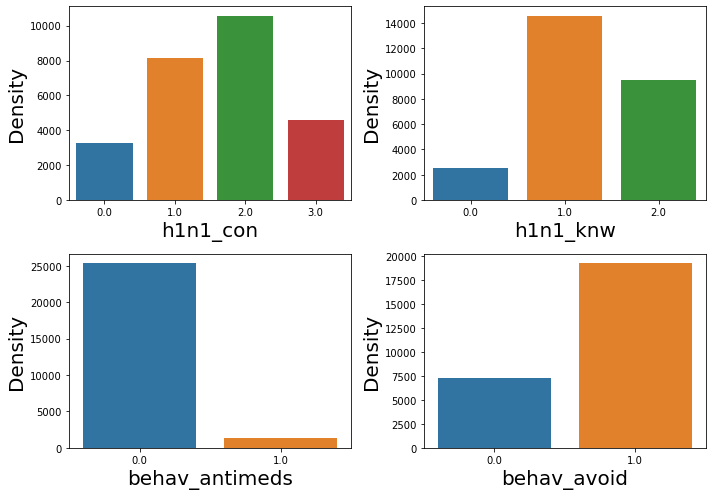

In [20]:
box=data[['h1n1_con','h1n1_knw','behav_antimeds','behav_avoid']]
plt.figure(figsize=(10,7))
pltnum=1
for i in box:
    plt.subplot(2,2,pltnum)
    sns.countplot(box[i])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Density',fontsize=20)
    pltnum+=1
plt.tight_layout()
plt.show() 

**Data Insights**
- **How many peoples are conren avout H1N1 Flue?** Approximately 50% Peoples are somewhat conern about H1N1 Flu.
- **How many peoples are aware of H1N1 Flu?**    Around all peoples are having knowledge of H1N1 flu, Approximately 90% Peoples are having a knowledge of H1N1 Flu.
- **Does peoples have taken any antiviral medicine other than Vaccine?** NO,people are dependent on vaccine only.  
- **Does people avoid contact with other peoples?** 75% people has avoided contact with others with flue like symptoms.

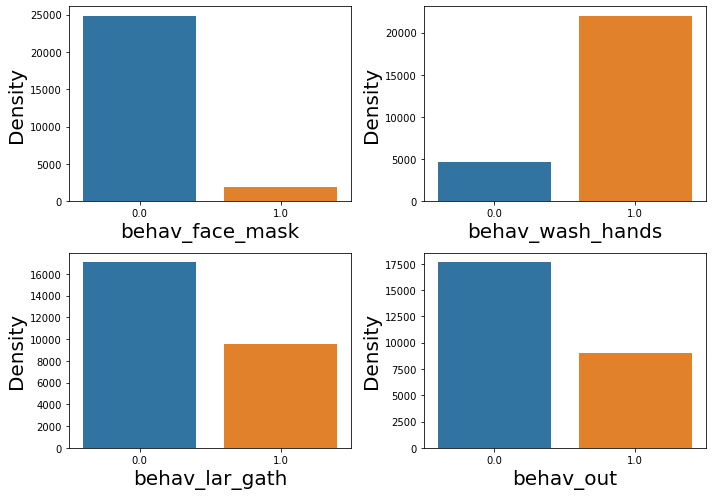

In [21]:
box=data[['behav_face_mask','behav_wash_hands','behav_lar_gath','behav_out']]
plt.figure(figsize=(10,7))
pltnum=1
for i in box:
    plt.subplot(2,2,pltnum)
    sns.countplot(box[i])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Density',fontsize=20)
    pltnum+=1
plt.tight_layout()
plt.show() 

**Data Insights**
- **Does people brought face mask?** No,people haven't brought face mask. 
- **Does people wash there hands frequently?** 80% Peoples had frequently washed hands or used hand sanitizer.
- **Does people still gather?** 62% Peoples Had reduced time at large gatherings.  
- **Does people prefer to live in household for most of the time?** 1/3rd people Had reduced contact with people outside of own household.

In [22]:
data.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_con', 'h1n1_knw',
       'behav_antimeds', 'behav_avoid', 'behav_face_mask', 'behav_wash_hands',
       'behav_lar_gath', 'behav_out', 'behav_touch', 'dr_h1n1', 'dr_sea',
       'chron_med', 'under_6', 'health_worker', 'health_insurance',
       'opn_h1n1_eff', 'opn_h1n1_risk', 'opn_h1n1_sick', 'opn_sea_eff',
       'opn_sea_risk', 'opn_sea_sick', 'age_group', 'education', 'race', 'sex',
       'poverty', 'marital_stat', 'rent/own', 'employment', 'census_msa',
       'house_adults', 'house_child'],
      dtype='object')

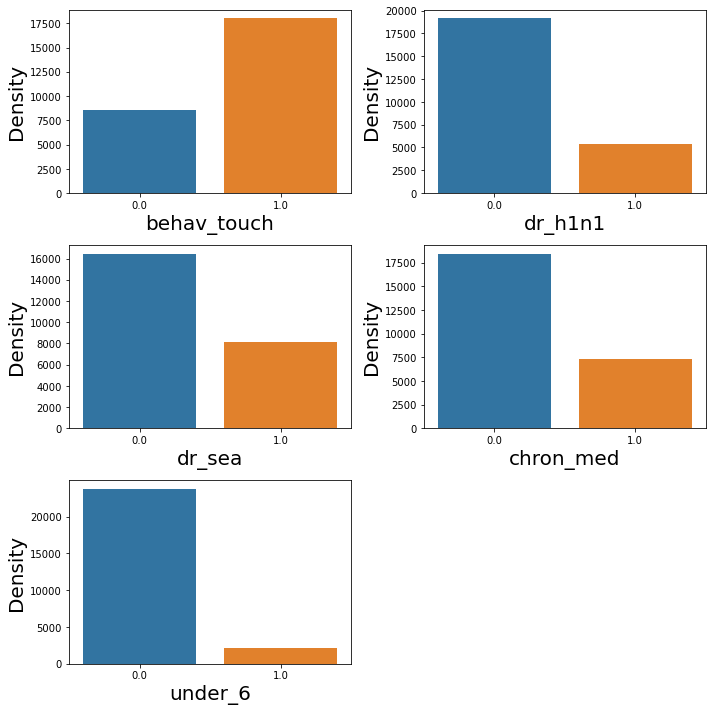

In [23]:
box=data[['behav_touch','dr_h1n1','dr_sea','chron_med', 'under_6']]
plt.figure(figsize=(10,10))
pltnum=1
for i in box:
    plt.subplot(3,2,pltnum)
    sns.countplot(box[i])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Density',fontsize=20)
    pltnum+=1
plt.tight_layout()
plt.show() 

**Data Insights**
- **How many people avoided touching thier eyes,nose,mouth?** 60% people avoided touching eyes, nose, or mouth.
- **What percentage of people are not recommended to take H1N1 flu vaccine?** 65% Peoples are not recommended to take H1N1 flu vaccine by doctor.
- **What percentage of people are not recommended to take seasonal flu vaccine?** 60% Peoples are not recommended to take seasonal flu vaccine by doctor. 
- **Does people have any chronic medical conditions?** 60% Peoples are not having any chronic medical conditions.
- **Does people have close contact with child under six mnths?** All people Had regular close contact with a child under the age of six months. .

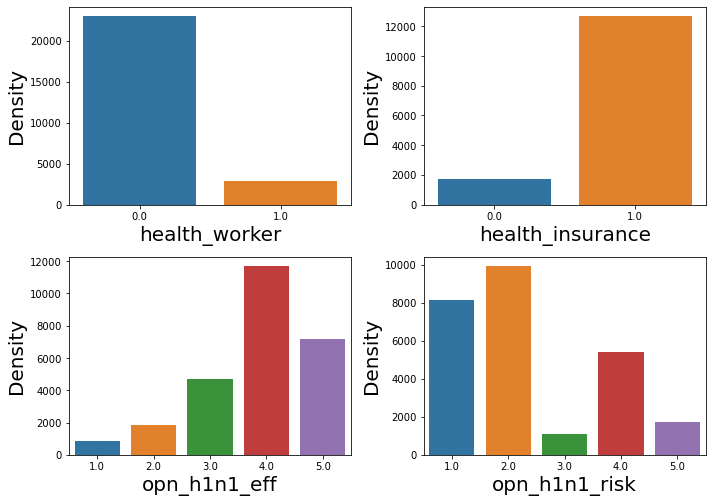

In [24]:
box=data[['health_worker','health_insurance','opn_h1n1_eff','opn_h1n1_risk']]
plt.figure(figsize=(10,10))
pltnum=1
for i in box:
    plt.subplot(3,2,pltnum)
    sns.countplot(box[i])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Density',fontsize=20)
    pltnum+=1
plt.tight_layout()
plt.show() 

**Data insights**
- **What is profession of this people?** All peoples are healthcare workers.
- **Does people have their health insurance?** All peoples have health insurance. 
- **How many people thinks that H1N1 vaccine is effective?** 70% peoples have opinion that the h1n1 vaccine is effective.
- **How many people thinks there is low risk of taking H1N1 vaccine?** 75% peoples have opinion that there is low risk of getting sick with h1n1 flu without vaccine.

In [25]:
data.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_con', 'h1n1_knw',
       'behav_antimeds', 'behav_avoid', 'behav_face_mask', 'behav_wash_hands',
       'behav_lar_gath', 'behav_out', 'behav_touch', 'dr_h1n1', 'dr_sea',
       'chron_med', 'under_6', 'health_worker', 'health_insurance',
       'opn_h1n1_eff', 'opn_h1n1_risk', 'opn_h1n1_sick', 'opn_sea_eff',
       'opn_sea_risk', 'opn_sea_sick', 'age_group', 'education', 'race', 'sex',
       'poverty', 'marital_stat', 'rent/own', 'employment', 'census_msa',
       'house_adults', 'house_child'],
      dtype='object')

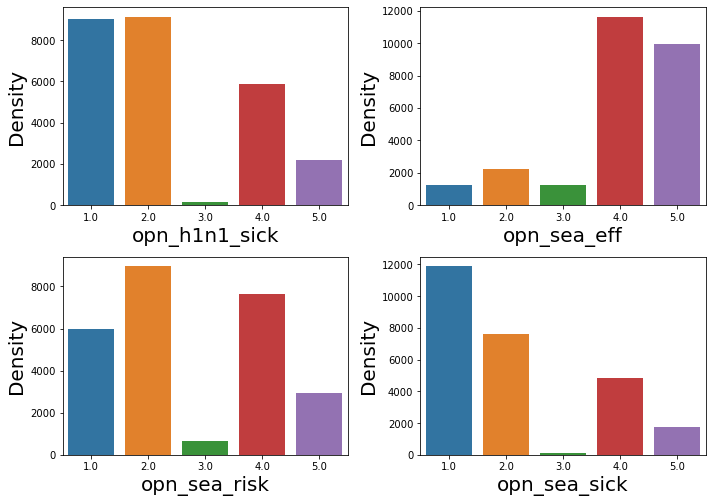

In [26]:
box=data[['opn_h1n1_sick','opn_sea_eff','opn_sea_risk','opn_sea_sick']]
plt.figure(figsize=(10,10))
pltnum=1
for i in box:
    plt.subplot(3,2,pltnum)
    sns.countplot(box[i])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Density',fontsize=20)
    pltnum+=1
plt.tight_layout()
plt.show() 

**Data insights**
- **How many people are not worried of getting sick from taking H1N1 vaccine?**  80% peooples are not worried of getting sick from taking H1N1 vaccine.
- **How many people thinks seasonal vaccine is effective?** 80% peoples thinks that seasonal flu vaccine is effective.
- **How many people thinks there is low risk of taking seasonal vaccine?**75% peoples have opinion that there is low risk of getting sick with seasonal flu without vaccine.
- **How many people are not worried of getting sick from taking seasonal vaccine?** 80% peooples are not worried of getting sick from taking seasonal vaccine.

In [27]:
data.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_con', 'h1n1_knw',
       'behav_antimeds', 'behav_avoid', 'behav_face_mask', 'behav_wash_hands',
       'behav_lar_gath', 'behav_out', 'behav_touch', 'dr_h1n1', 'dr_sea',
       'chron_med', 'under_6', 'health_worker', 'health_insurance',
       'opn_h1n1_eff', 'opn_h1n1_risk', 'opn_h1n1_sick', 'opn_sea_eff',
       'opn_sea_risk', 'opn_sea_sick', 'age_group', 'education', 'race', 'sex',
       'poverty', 'marital_stat', 'rent/own', 'employment', 'census_msa',
       'house_adults', 'house_child'],
      dtype='object')

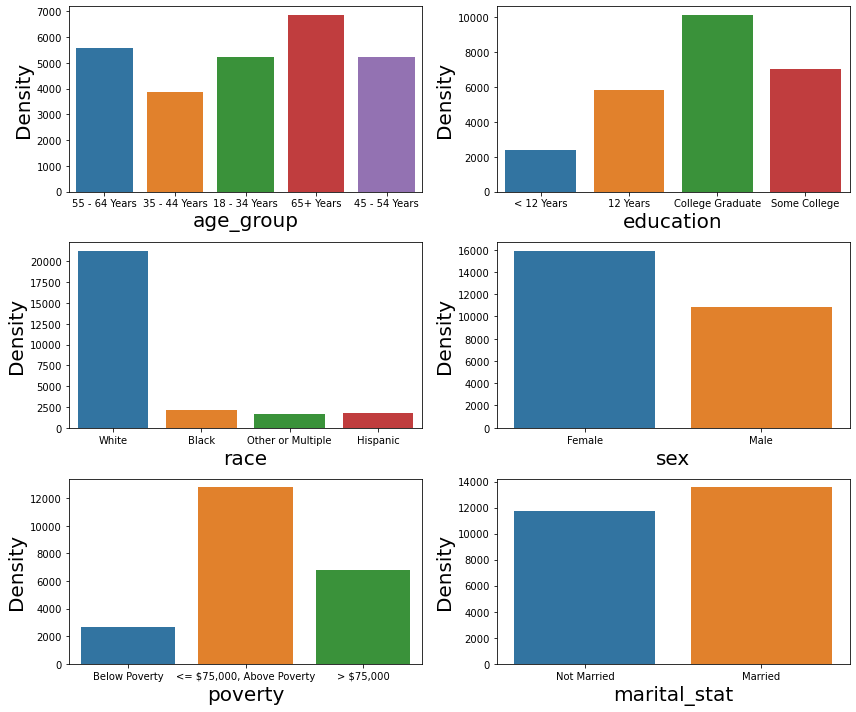

In [28]:
box=data[['age_group','education','race','sex','poverty','marital_stat']]
plt.figure(figsize=(12,10))
pltnum=1
for i in box:
    plt.subplot(3,2,pltnum)
    sns.countplot(box[i])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Density',fontsize=20)
    pltnum+=1
plt.tight_layout()
plt.show() 

**Data insights**
- **What is literacy rate?** Most peoples have completed 12 year of education and some completed there further studies, all are literate peoples.
- **What are the peoples origin?** Maximum peoples are having origins in any of the original peoples of Europe, the Middle East, or North Africa.
- **How many peoples are above poverty?** 50% peoples are from above poverty level.10% are from below poverty level and others are middle class level.
- **How many peoples are married?** Dataset contains approximately equal married and unmarried peoples.


In [29]:
data.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_con', 'h1n1_knw',
       'behav_antimeds', 'behav_avoid', 'behav_face_mask', 'behav_wash_hands',
       'behav_lar_gath', 'behav_out', 'behav_touch', 'dr_h1n1', 'dr_sea',
       'chron_med', 'under_6', 'health_worker', 'health_insurance',
       'opn_h1n1_eff', 'opn_h1n1_risk', 'opn_h1n1_sick', 'opn_sea_eff',
       'opn_sea_risk', 'opn_sea_sick', 'age_group', 'education', 'race', 'sex',
       'poverty', 'marital_stat', 'rent/own', 'employment', 'census_msa',
       'house_adults', 'house_child'],
      dtype='object')

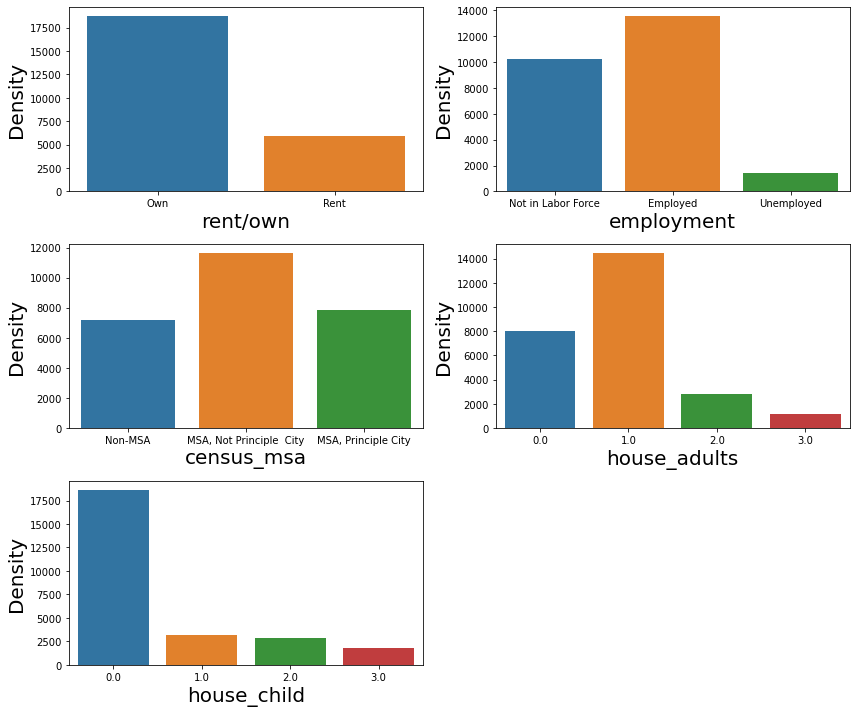

In [30]:
box=data[['rent/own','employment','census_msa','house_adults','house_child']]
plt.figure(figsize=(12,10))
pltnum=1
for i in box:
    plt.subplot(3,2,pltnum)
    sns.countplot(box[i])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Density',fontsize=20)
    pltnum+=1
plt.tight_layout()
plt.show() 

**Data insights**
- **How many peoples are having their own house ?** 55% peoples are living in there owned house
- **Does people are employed?** 50% peoples are employed,10% peoples are unemployed and others are not in labour force.
- **How many people lives in principle city?** 40% peoples are living in metropolitan statistical areas but not in a principle cities, 30% peoples are from other areas and 30% peoples are from metropolitan statistical areas plus in a principal city
- **How many adults are there in one house?** 50% peoples are living with companion, 30% people are living independently and other are living with more than 1 peoples.
- **Does people have childrens?** 70% peoples are not having childrens, others are having 1 or more than 1 childerns.

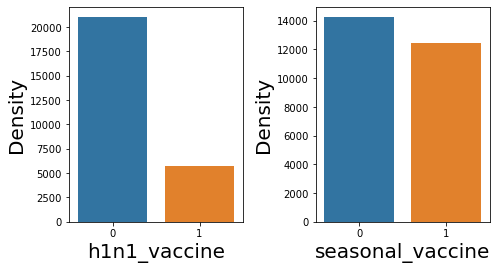

In [31]:
# plotting target variables
box=data[['h1n1_vaccine','seasonal_vaccine']]
plt.figure(figsize=(7,7))
pltnum=1
for i in box:
    plt.subplot(2,2,pltnum)
    sns.countplot(box[i])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Density',fontsize=20)
    pltnum+=1
plt.tight_layout()
plt.show() 

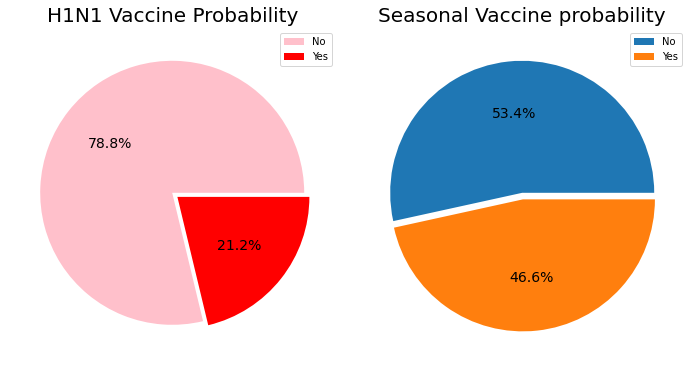

In [32]:
#Multiple pie charts in one grid for Car Engine shape, Gear, and Carb.
fig,a=plt.subplots(1,2,squeeze=False,figsize=(10,8))

a[0,0].pie(data['h1n1_vaccine'].value_counts(normalize=True),explode={0,0.05},autopct='%1.1f%%',textprops={'fontsize': 14},colors = ['pink', 'red'])
a[0,0].legend(['No', 'Yes'])
a[0,0].set_title('H1N1 Vaccine Probability',fontsize=20)
a[0,1].pie(data['seasonal_vaccine'].value_counts(normalize=True),explode={0,0.05},autopct='%1.1f%%',textprops={'fontsize': 14})
a[0,1].legend(['No', 'Yes'])
a[0,1].set_title('Seasonal Vaccine probability',fontsize=20)
plt.tight_layout(pad=2);

**Data insights**
- **What is probaility of this people getting H1N1 Vaccine?** 21.2% people will recieve h1n1 vaccine.
- **What is probaility of this people getting Seasonal Vaccine?** 53.4% peoples will recieve seasonal vaccine.

In [33]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Bivariate analysis

In [34]:
data.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_con', 'h1n1_knw',
       'behav_antimeds', 'behav_avoid', 'behav_face_mask', 'behav_wash_hands',
       'behav_lar_gath', 'behav_out', 'behav_touch', 'dr_h1n1', 'dr_sea',
       'chron_med', 'under_6', 'health_worker', 'health_insurance',
       'opn_h1n1_eff', 'opn_h1n1_risk', 'opn_h1n1_sick', 'opn_sea_eff',
       'opn_sea_risk', 'opn_sea_sick', 'age_group', 'education', 'race', 'sex',
       'poverty', 'marital_stat', 'rent/own', 'employment', 'census_msa',
       'house_adults', 'house_child'],
      dtype='object')

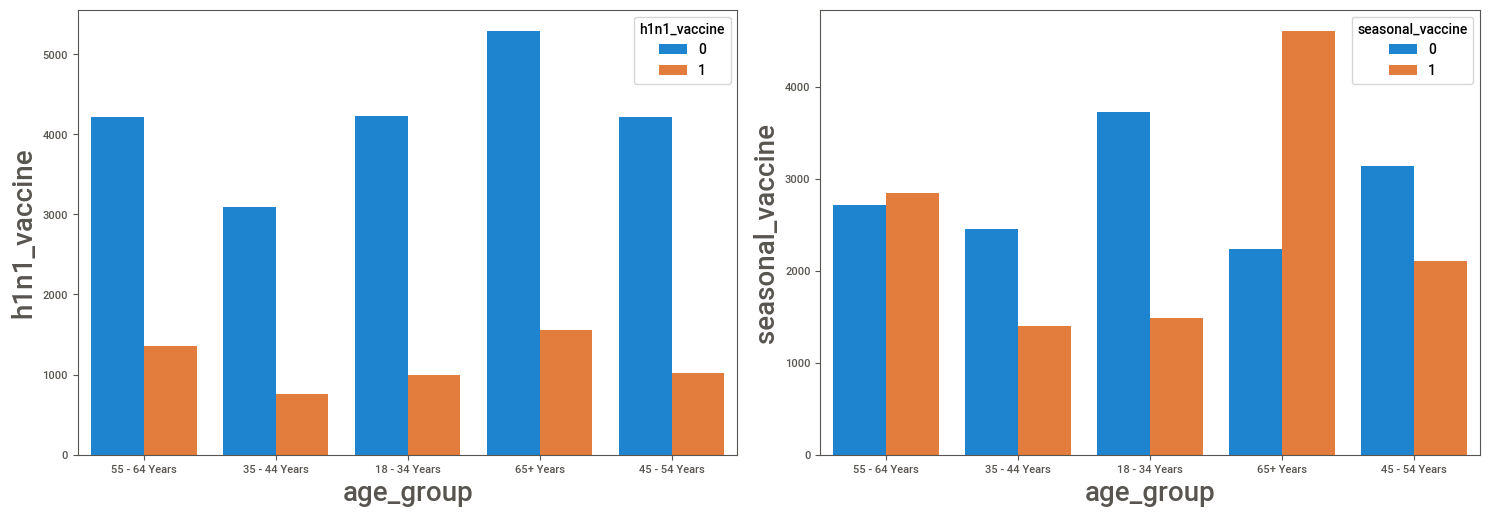

In [35]:
box1 = data[['age_group']]
box2 = data[['h1n1_vaccine','seasonal_vaccine']]
plt.figure(figsize=(15,15))
pltnum=1
for i in box1:
    for j in box2:
        plt.subplot(3,2,pltnum)
        sns.countplot(x=box1[i],hue=box2[j])
        plt.xlabel(i,fontsize=20)
        plt.ylabel(j,fontsize=20)
        pltnum+=1
plt.tight_layout()
plt.show()   

**What is the probibility of getting vaccine with respect to Age group?**
- Probability of people not getting h1n1 vaccine is higher than chances of getting vaccine in all age group.
- Probability of people getting seasonal vaccine is higher above 55 age.

In [36]:
data.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_con', 'h1n1_knw',
       'behav_antimeds', 'behav_avoid', 'behav_face_mask', 'behav_wash_hands',
       'behav_lar_gath', 'behav_out', 'behav_touch', 'dr_h1n1', 'dr_sea',
       'chron_med', 'under_6', 'health_worker', 'health_insurance',
       'opn_h1n1_eff', 'opn_h1n1_risk', 'opn_h1n1_sick', 'opn_sea_eff',
       'opn_sea_risk', 'opn_sea_sick', 'age_group', 'education', 'race', 'sex',
       'poverty', 'marital_stat', 'rent/own', 'employment', 'census_msa',
       'house_adults', 'house_child'],
      dtype='object')

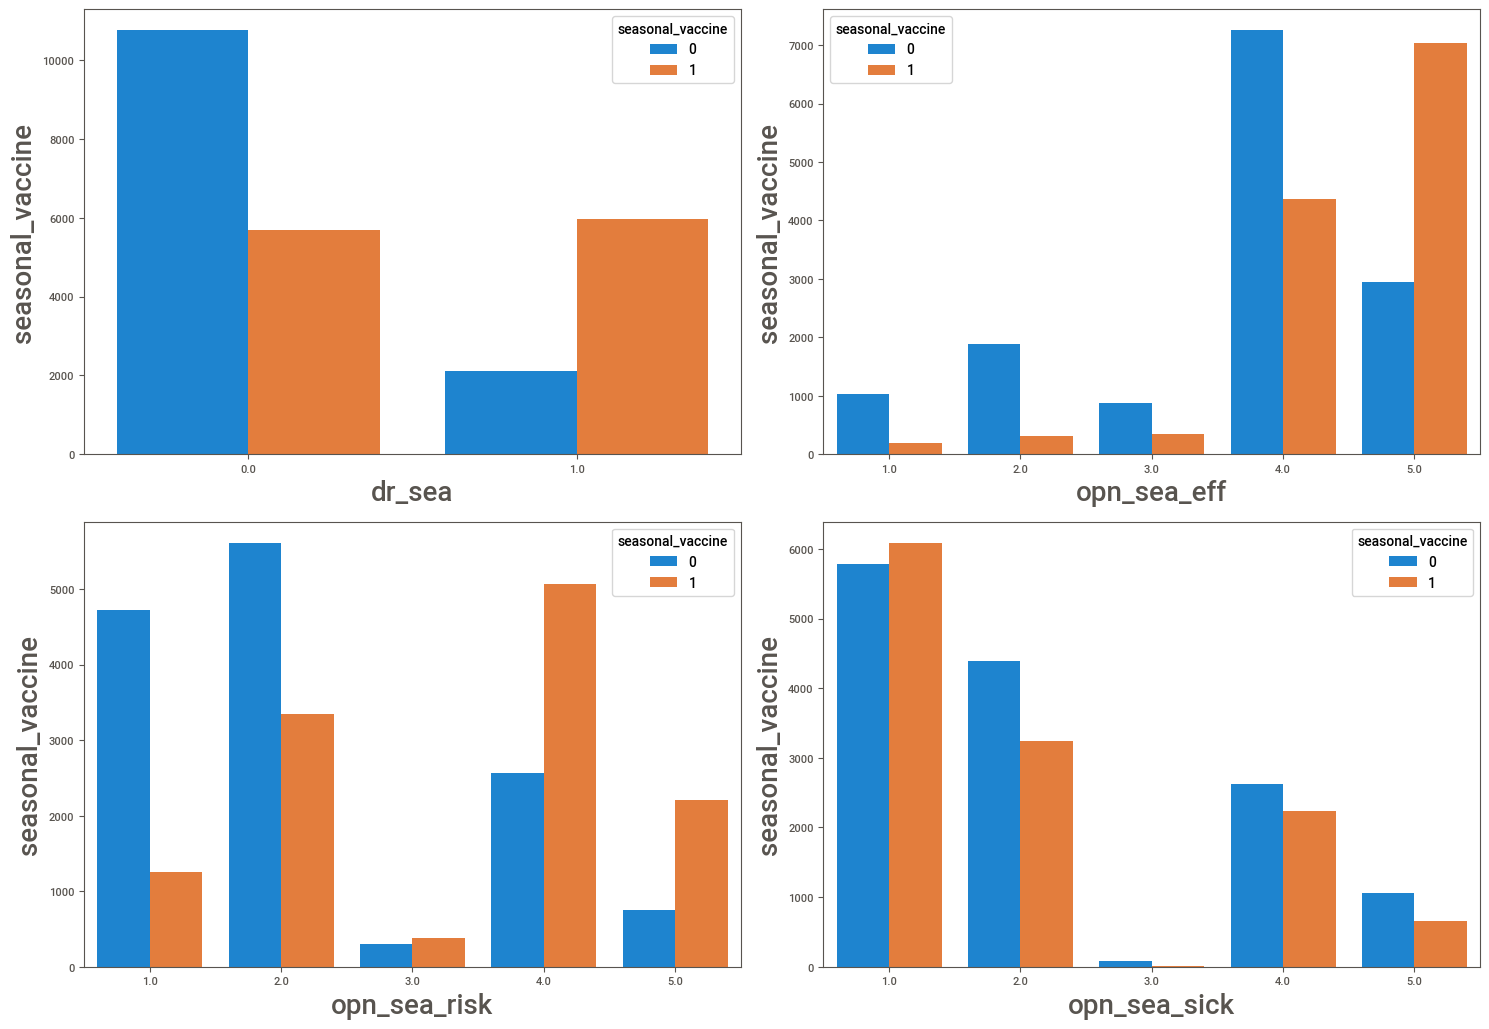

In [37]:
box1 = data[['dr_sea','opn_sea_eff',
       'opn_sea_risk', 'opn_sea_sick']]
box2 = data[['seasonal_vaccine']]
plt.figure(figsize=(15,15))
pltnum=1
for i in box1:
    for j in box2:
        plt.subplot(3,2,pltnum)
        sns.countplot(x=box1[i],hue=box2[j])
        plt.xlabel(i,fontsize=20)
        plt.ylabel(j,fontsize=20)
        pltnum+=1
plt.tight_layout()
plt.show()   

**Data Insights**
- **Does people taking with doctor recommendation of seasonal vaccine?** Yes


In [38]:
data.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_con', 'h1n1_knw',
       'behav_antimeds', 'behav_avoid', 'behav_face_mask', 'behav_wash_hands',
       'behav_lar_gath', 'behav_out', 'behav_touch', 'dr_h1n1', 'dr_sea',
       'chron_med', 'under_6', 'health_worker', 'health_insurance',
       'opn_h1n1_eff', 'opn_h1n1_risk', 'opn_h1n1_sick', 'opn_sea_eff',
       'opn_sea_risk', 'opn_sea_sick', 'age_group', 'education', 'race', 'sex',
       'poverty', 'marital_stat', 'rent/own', 'employment', 'census_msa',
       'house_adults', 'house_child'],
      dtype='object')

In [39]:
plt.figure(figsize=(150,150))

<Figure size 15000x15000 with 0 Axes>

<Figure size 15000x15000 with 0 Axes>

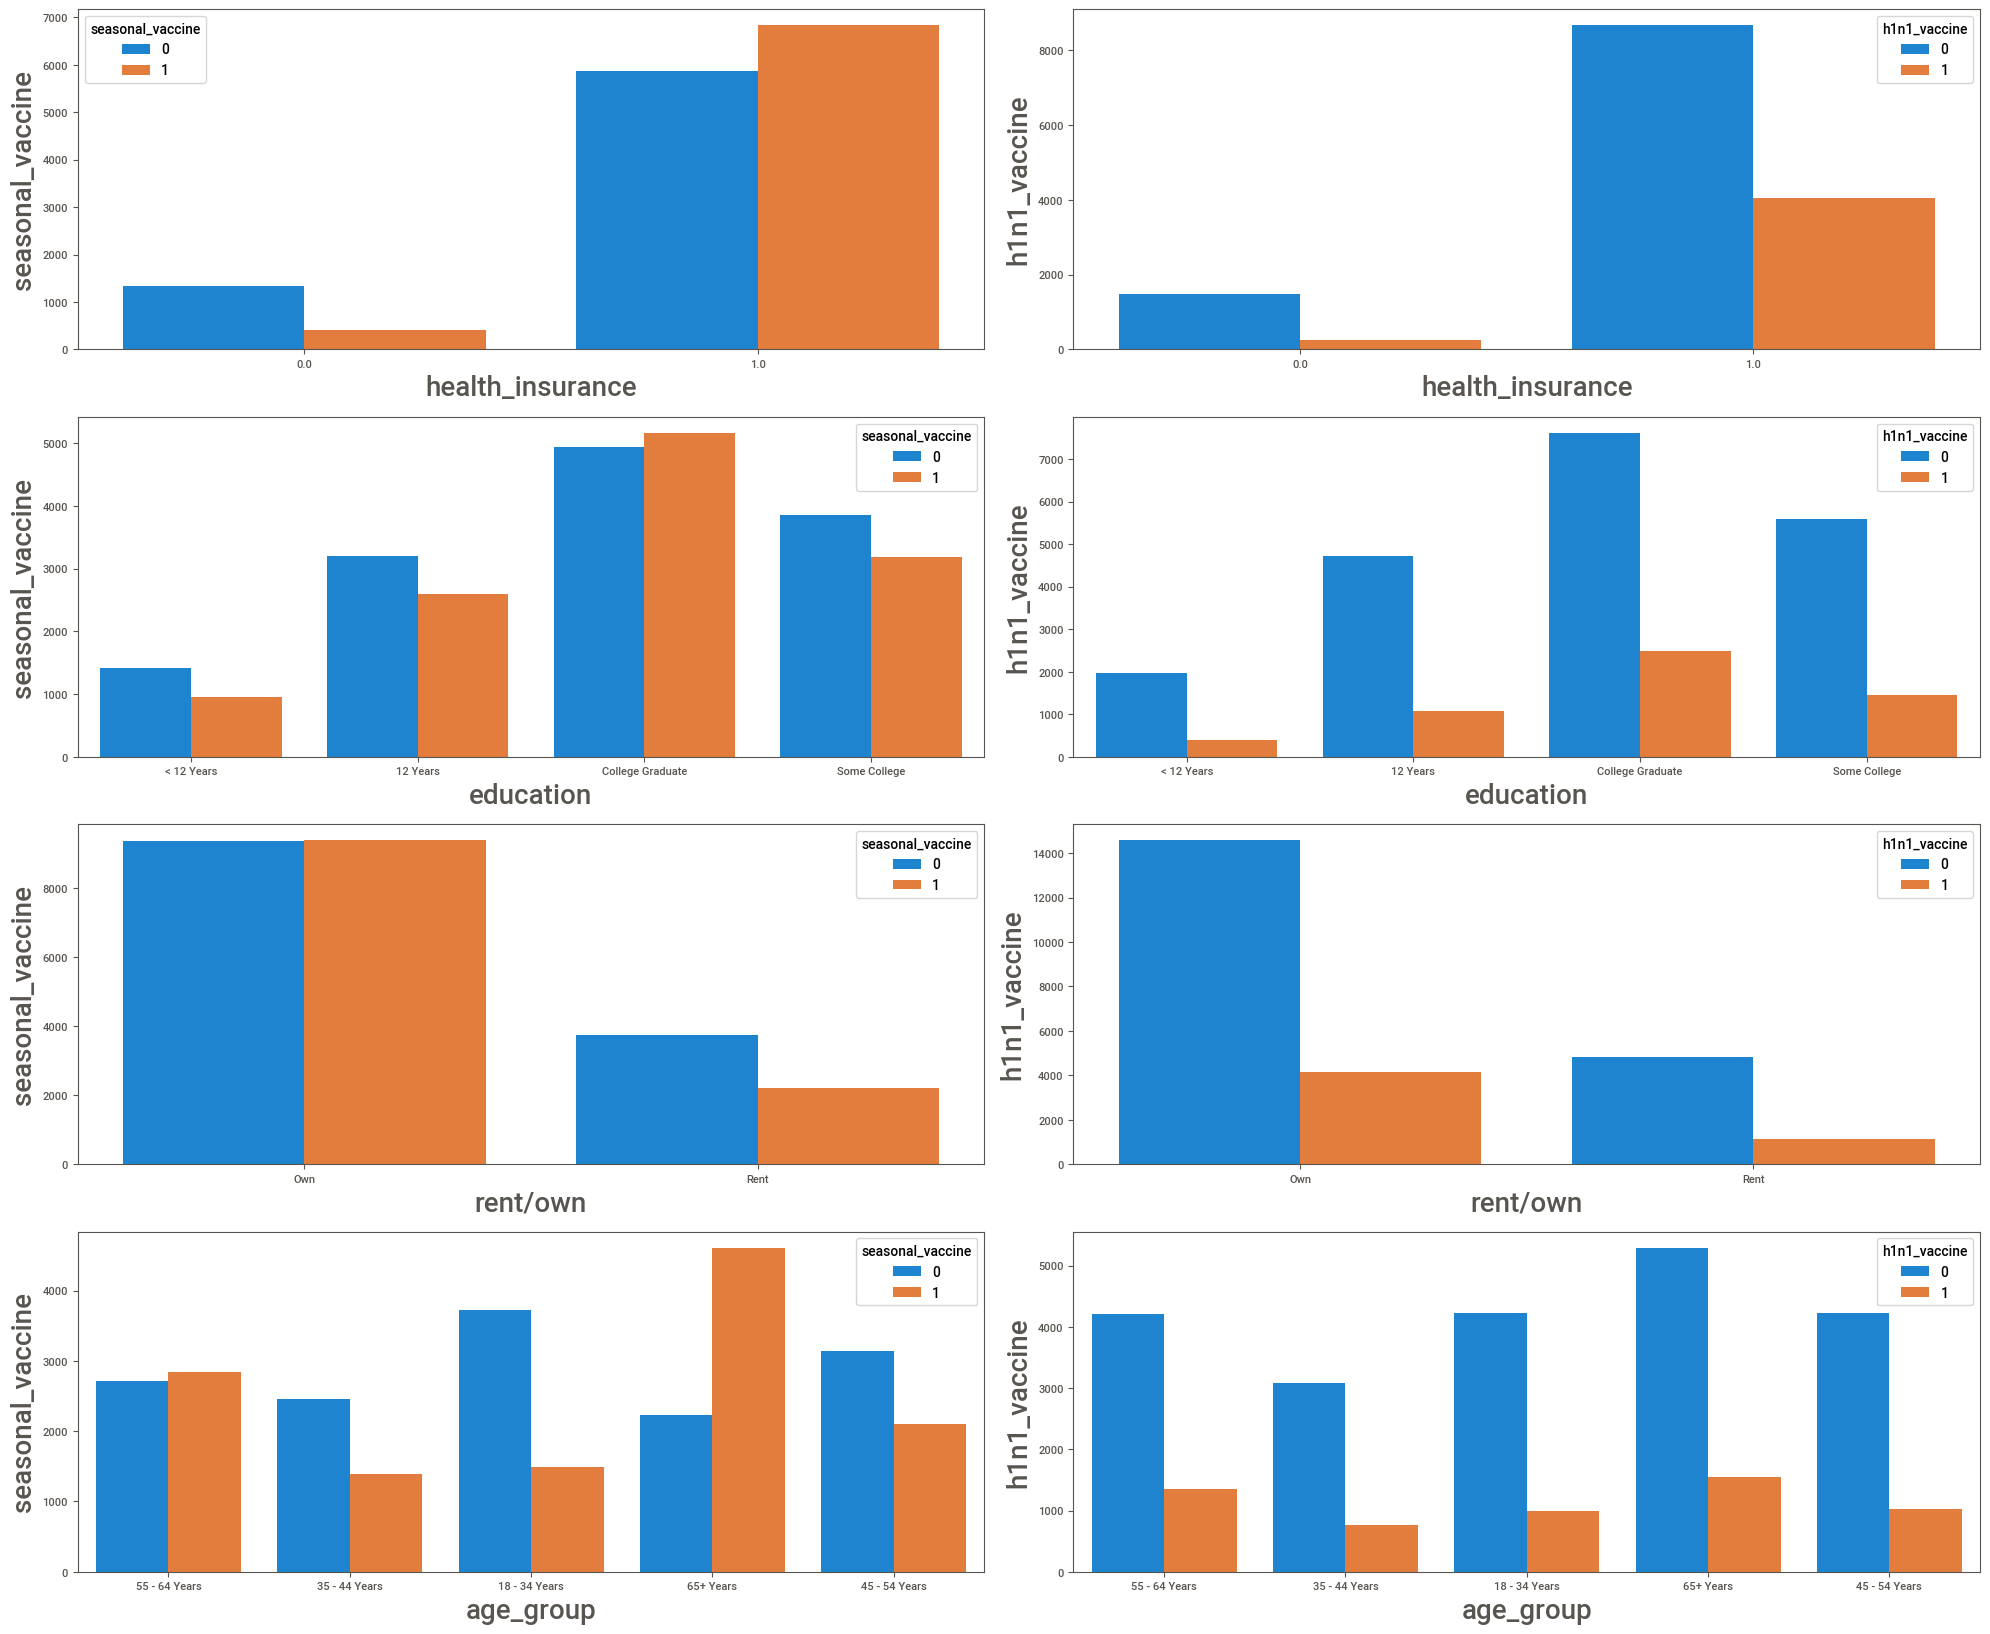

In [40]:
box1 = data[['health_insurance','education','rent/own','age_group']]
box2 = data[['seasonal_vaccine','h1n1_vaccine']]
plt.figure(figsize=(20,20))
pltnum=1
for i in box1:
    for j in box2:
        plt.subplot(5,2,pltnum)
        sns.countplot(x=box1[i],hue=box2[j])
        plt.xlabel(i,fontsize=20)
        plt.ylabel(j,fontsize=20)
        pltnum+=1
plt.tight_layout()
plt.show()  

**Data insights**
- **How health insurance affects the probability of getting vaccine?** People having health insurance have the higher probability to get seasonal vaccine.
- **What age group is getting vaccine most?** People with age above 55 years have higher probability to get seasonal vaccine.

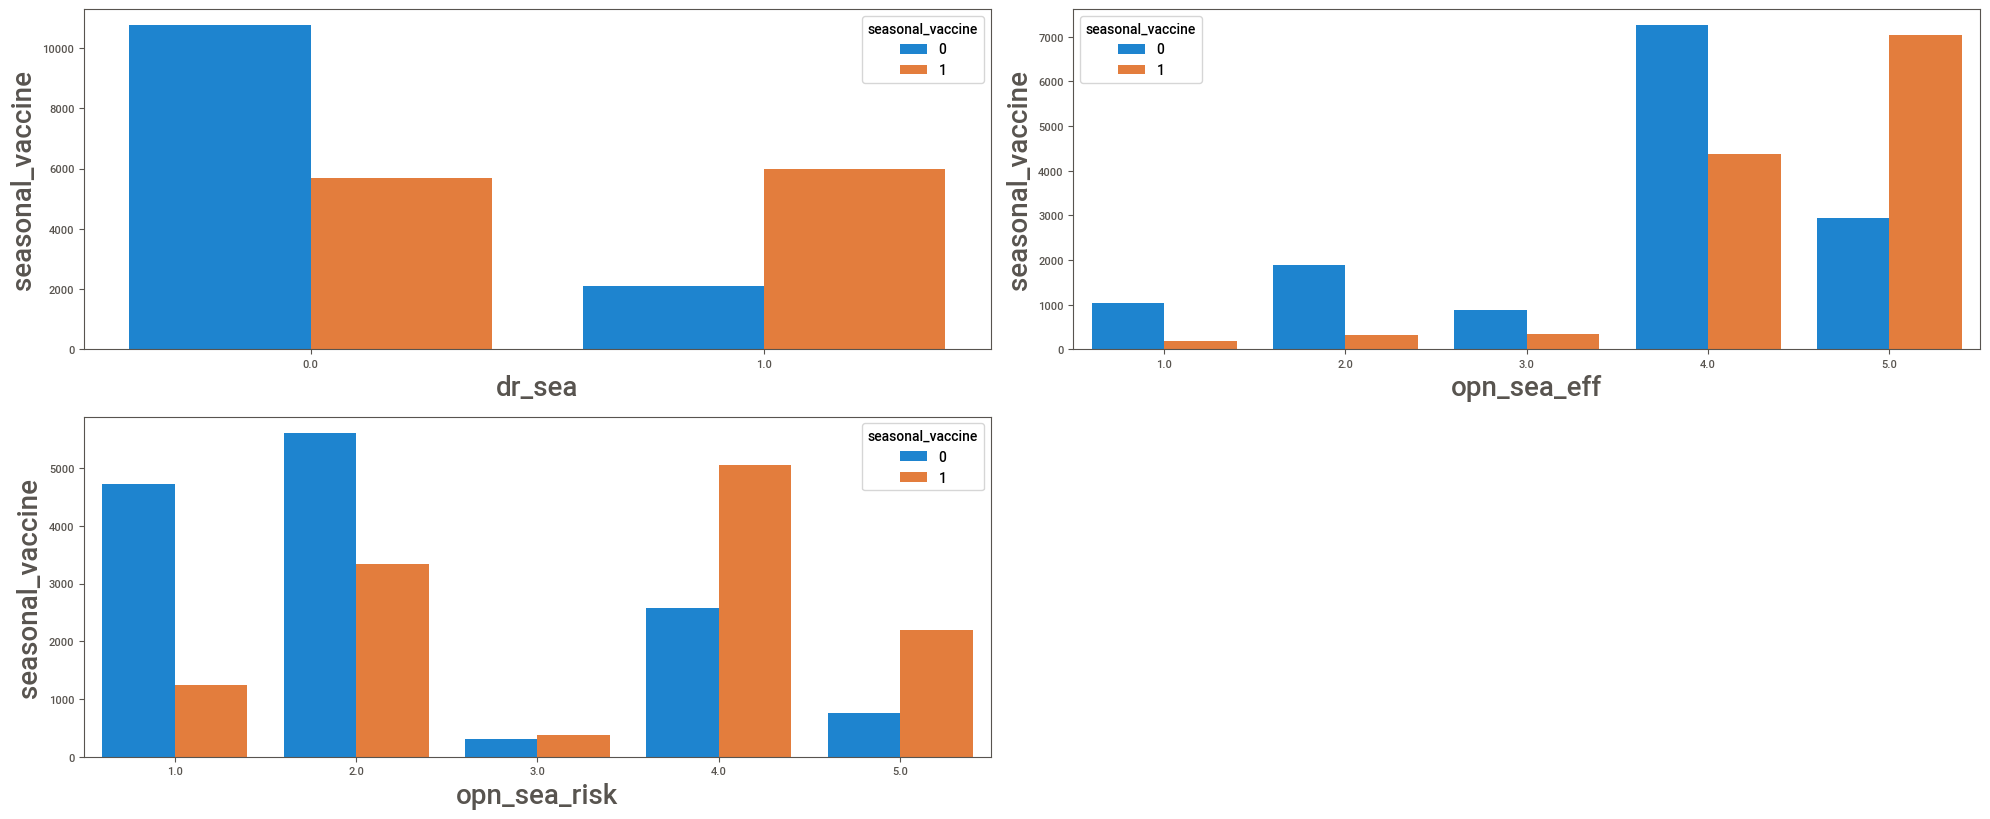

In [41]:
box1 = data[['dr_sea','opn_sea_eff','opn_sea_risk']]
box2 = data[['seasonal_vaccine']]
plt.figure(figsize=(20,20))
pltnum=1
for i in box1:
    for j in box2:
        plt.subplot(5,2,pltnum)
        sns.countplot(x=box1[i],hue=box2[j])
        plt.xlabel(i,fontsize=20)
        plt.ylabel(j,fontsize=20)
        pltnum+=1
plt.tight_layout()
plt.show()  

**Data insights**
- People who are recommeded by doctor to take seasonal vaccine have higher probability to get seasonal vaccine.
- People having opinion that seasonal vaccine is effective are have higher probability to get seasonal vaccine
- People having opinion that there is risk for taking seasonal vaccine is actually having higher probability to get seasonal vaccine.

## We will check the heatmap for the types of correlation. There are two types of correlation

- Positive Correlation.
- Negative Correlation.

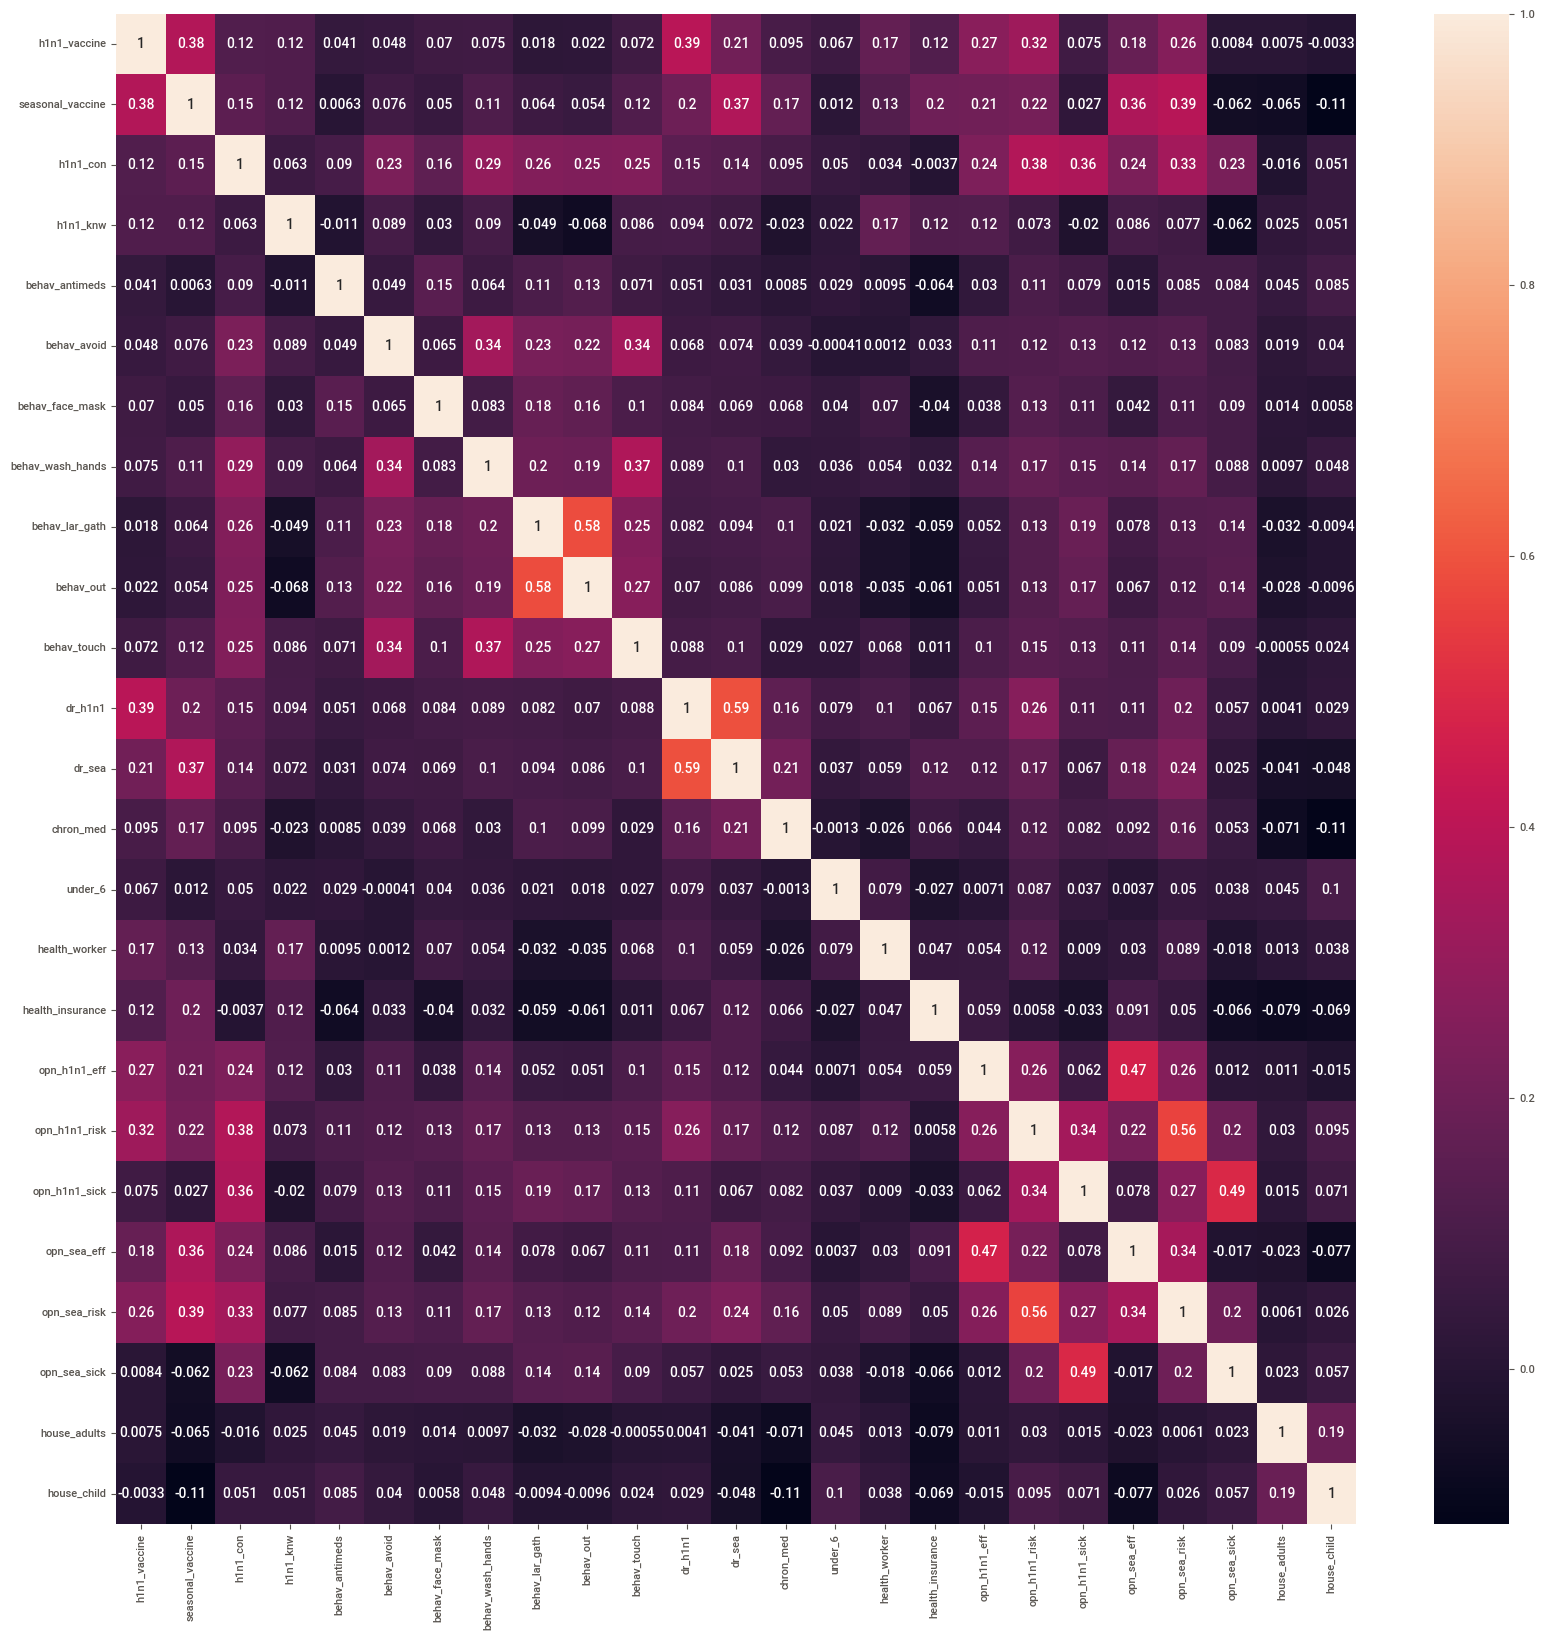

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

## Positive correlation
- h1n1_vaccine = dr_h1n1,dr_sea,opn_h1n1_risk,opn_h1n1_eff,health_worker,health_insurance,h1n1_knw,h1n1_con
- seasonal_vaccine = dr_sea,opn_sea_risk,opn_sea_eff,health_worker,health_insurance,chron_med,behav_touch,behav_wash_hand

#  5] Data Pre processing

In [43]:
# Checking for null/missing vavlues
data.isnull().sum()*100/len(data)

h1n1_vaccine         0.000000
seasonal_vaccine     0.000000
h1n1_con             0.344479
h1n1_knw             0.434343
behav_antimeds       0.265848
behav_avoid          0.778822
behav_face_mask      0.071142
behav_wash_hands     0.157262
behav_lar_gath       0.325757
behav_out            0.307036
behav_touch          0.479275
dr_h1n1              8.087767
dr_sea               8.087767
chron_med            3.635751
under_6              3.070356
health_worker        3.010447
health_insurance    45.957989
opn_h1n1_eff         1.464036
opn_h1n1_risk        1.452803
opn_h1n1_sick        1.479013
opn_sea_eff          1.729884
opn_sea_risk         1.924589
opn_sea_sick         2.010709
age_group            0.000000
education            5.268282
race                 0.000000
sex                  0.000000
poverty             16.561201
marital_stat         5.272026
rent/own             7.645936
employment           5.477965
census_msa           0.000000
house_adults         0.932340
house_chil

In [44]:
# dropping columns having more than 5% missing values
data.drop(labels =['dr_h1n1','dr_sea','health_insurance','education','poverty','marital_stat','rent/own','employment'], axis=1, inplace=True) 

In [45]:
data.isnull().sum()*100/len(data)

h1n1_vaccine        0.000000
seasonal_vaccine    0.000000
h1n1_con            0.344479
h1n1_knw            0.434343
behav_antimeds      0.265848
behav_avoid         0.778822
behav_face_mask     0.071142
behav_wash_hands    0.157262
behav_lar_gath      0.325757
behav_out           0.307036
behav_touch         0.479275
chron_med           3.635751
under_6             3.070356
health_worker       3.010447
opn_h1n1_eff        1.464036
opn_h1n1_risk       1.452803
opn_h1n1_sick       1.479013
opn_sea_eff         1.729884
opn_sea_risk        1.924589
opn_sea_sick        2.010709
age_group           0.000000
race                0.000000
sex                 0.000000
census_msa          0.000000
house_adults        0.932340
house_child         0.932340
dtype: float64

In [46]:
data.isnull().sum()

h1n1_vaccine          0
seasonal_vaccine      0
h1n1_con             92
h1n1_knw            116
behav_antimeds       71
behav_avoid         208
behav_face_mask      19
behav_wash_hands     42
behav_lar_gath       87
behav_out            82
behav_touch         128
chron_med           971
under_6             820
health_worker       804
opn_h1n1_eff        391
opn_h1n1_risk       388
opn_h1n1_sick       395
opn_sea_eff         462
opn_sea_risk        514
opn_sea_sick        537
age_group             0
race                  0
sex                   0
census_msa            0
house_adults        249
house_child         249
dtype: int64

In [47]:
data.h1n1_con.value_counts()

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_con, dtype: int64

In [48]:
data.loc[data['h1n1_con'].isnull(),'h1n1_con']= 2.0

In [49]:
data.h1n1_knw.value_counts()

1.0    14598
2.0     9487
0.0     2506
Name: h1n1_knw, dtype: int64

In [50]:
data.loc[data['h1n1_knw'].isnull(),'h1n1_knw']= 1.0

In [51]:
data.behav_antimeds.value_counts()

0.0    25335
1.0     1301
Name: behav_antimeds, dtype: int64

In [52]:
data.loc[data['behav_antimeds'].isnull(),'behav_antimeds']= 0.0

In [53]:
data.behav_avoid.value_counts()

1.0    19228
0.0     7271
Name: behav_avoid, dtype: int64

In [54]:
data.loc[data['behav_avoid'].isnull(),'behav_avoid']= 1.0

In [55]:
data.behav_face_mask.value_counts()

0.0    24847
1.0     1841
Name: behav_face_mask, dtype: int64

In [56]:
data.loc[data['behav_face_mask'].isnull(),'behav_face_mask']= 0.0

In [57]:
data.behav_wash_hands.value_counts()

1.0    22015
0.0     4650
Name: behav_wash_hands, dtype: int64

In [58]:
data.loc[data['behav_wash_hands'].isnull(),'behav_wash_hands']= 1.0

In [59]:
data.behav_lar_gath.value_counts()

0.0    17073
1.0     9547
Name: behav_lar_gath, dtype: int64

In [60]:
data.loc[data['behav_lar_gath'].isnull(),'behav_lar_gath']= 0.0

In [61]:
data.behav_out.value_counts()

0.0    17644
1.0     8981
Name: behav_out, dtype: int64

In [62]:
data.loc[data['behav_out'].isnull(),'behav_out']= 0.0

In [63]:
data.behav_touch.value_counts()

1.0    18001
0.0     8578
Name: behav_touch, dtype: int64

In [64]:
data.loc[data['behav_touch'].isnull(),'behav_touch']= 1.0

In [65]:
data.chron_med.value_counts()

0.0    18446
1.0     7290
Name: chron_med, dtype: int64

In [66]:
data.loc[data['chron_med'].isnull(),'chron_med']= 0.0

In [67]:
data.under_6.value_counts()

0.0    23749
1.0     2138
Name: under_6, dtype: int64

In [68]:
data.loc[data['under_6'].isnull(),'under_6']= 0.0

In [69]:
data.health_worker.value_counts()

0.0    23004
1.0     2899
Name: health_worker, dtype: int64

In [70]:
data.loc[data['health_worker'].isnull(),'health_worker']= 0.0

In [71]:
data.opn_h1n1_eff.value_counts()

4.0    11683
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: opn_h1n1_eff, dtype: int64

In [72]:
data.loc[data['opn_h1n1_eff'].isnull(),'opn_h1n1_eff']= 4.0

In [73]:
data.opn_h1n1_risk.value_counts()

2.0    9919
1.0    8139
4.0    5394
5.0    1750
3.0    1117
Name: opn_h1n1_risk, dtype: int64

In [74]:
data.loc[data['opn_h1n1_risk'].isnull(),'opn_h1n1_risk']= 2.0

In [75]:
data.opn_h1n1_sick.value_counts()

2.0    9129
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: opn_h1n1_sick, dtype: int64

In [76]:
data.loc[data['opn_h1n1_sick'].isnull(),'opn_h1n1_sick']= 2.0

In [77]:
data.opn_sea_eff.value_counts()

4.0    11629
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: opn_sea_eff, dtype: int64

In [78]:
data.loc[data['opn_sea_eff'].isnull(),'opn_sea_eff']= 4.0

In [79]:
data.opn_sea_risk.value_counts()

2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: opn_sea_risk, dtype: int64

In [80]:
data.loc[data['opn_sea_risk'].isnull(),'opn_sea_risk']= 2.0

In [81]:
data.opn_sea_sick.value_counts()

1.0    11870
2.0     7633
4.0     4852
5.0     1721
3.0       94
Name: opn_sea_sick, dtype: int64

In [82]:
data.loc[data['opn_sea_sick'].isnull(),'opn_sea_sick']= 1.0

In [83]:
data.house_adults.value_counts()

1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: house_adults, dtype: int64

In [84]:
data.loc[data['house_adults'].isnull(),'house_adults']= 1.0

In [85]:
data.house_child.value_counts()

0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: house_child, dtype: int64

In [86]:
data.loc[data['house_child'].isnull(),'house_child']= 0.0

In [87]:
data.isnull().sum()

h1n1_vaccine        0
seasonal_vaccine    0
h1n1_con            0
h1n1_knw            0
behav_antimeds      0
behav_avoid         0
behav_face_mask     0
behav_wash_hands    0
behav_lar_gath      0
behav_out           0
behav_touch         0
chron_med           0
under_6             0
health_worker       0
opn_h1n1_eff        0
opn_h1n1_risk       0
opn_h1n1_sick       0
opn_sea_eff         0
opn_sea_risk        0
opn_sea_sick        0
age_group           0
race                0
sex                 0
census_msa          0
house_adults        0
house_child         0
dtype: int64

##  NOTE - There are no null values now

In [88]:
data.head()

,h1n1_vaccine,seasonal_vaccine,h1n1_con,h1n1_knw,behav_antimeds,behav_avoid,behav_face_mask,behav_wash_hands,behav_lar_gath,behav_out,behav_touch,chron_med,under_6,health_worker,opn_h1n1_eff,opn_h1n1_risk,opn_h1n1_sick,opn_sea_eff,opn_sea_risk,opn_sea_sick,age_group,race,sex,census_msa,house_adults,house_child
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,White,Female,Non-MSA,0.0,0.0
1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,White,Male,"MSA, Not Principle City",0.0,0.0
2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,White,Male,"MSA, Not Principle City",2.0,0.0
3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,White,Female,"MSA, Principle City",0.0,0.0
4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,White,Female,"MSA, Not Principle City",1.0,0.0


In [89]:
## Using label encoder to convert the categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data.age_group=lc.fit_transform(data.age_group)
data.race=lc.fit_transform(data.race)
data.sex=lc.fit_transform(data.sex)
data.census_msa=lc.fit_transform(data.census_msa)

In [90]:
data.head()

,h1n1_vaccine,seasonal_vaccine,h1n1_con,h1n1_knw,behav_antimeds,behav_avoid,behav_face_mask,behav_wash_hands,behav_lar_gath,behav_out,behav_touch,chron_med,under_6,health_worker,opn_h1n1_eff,opn_h1n1_risk,opn_h1n1_sick,opn_sea_eff,opn_sea_risk,opn_sea_sick,age_group,race,sex,census_msa,house_adults,house_child
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,3,3,0,2,0.0,0.0
1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,1,3,1,0,0.0,0.0
2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,0,3,1,0,2.0,0.0
3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,4,3,0,1,0.0,0.0
4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,2,3,0,0,1.0,0.0


In [91]:
data.shape

(26707, 26)

# 6] Feature selection

# Heatmap correlation

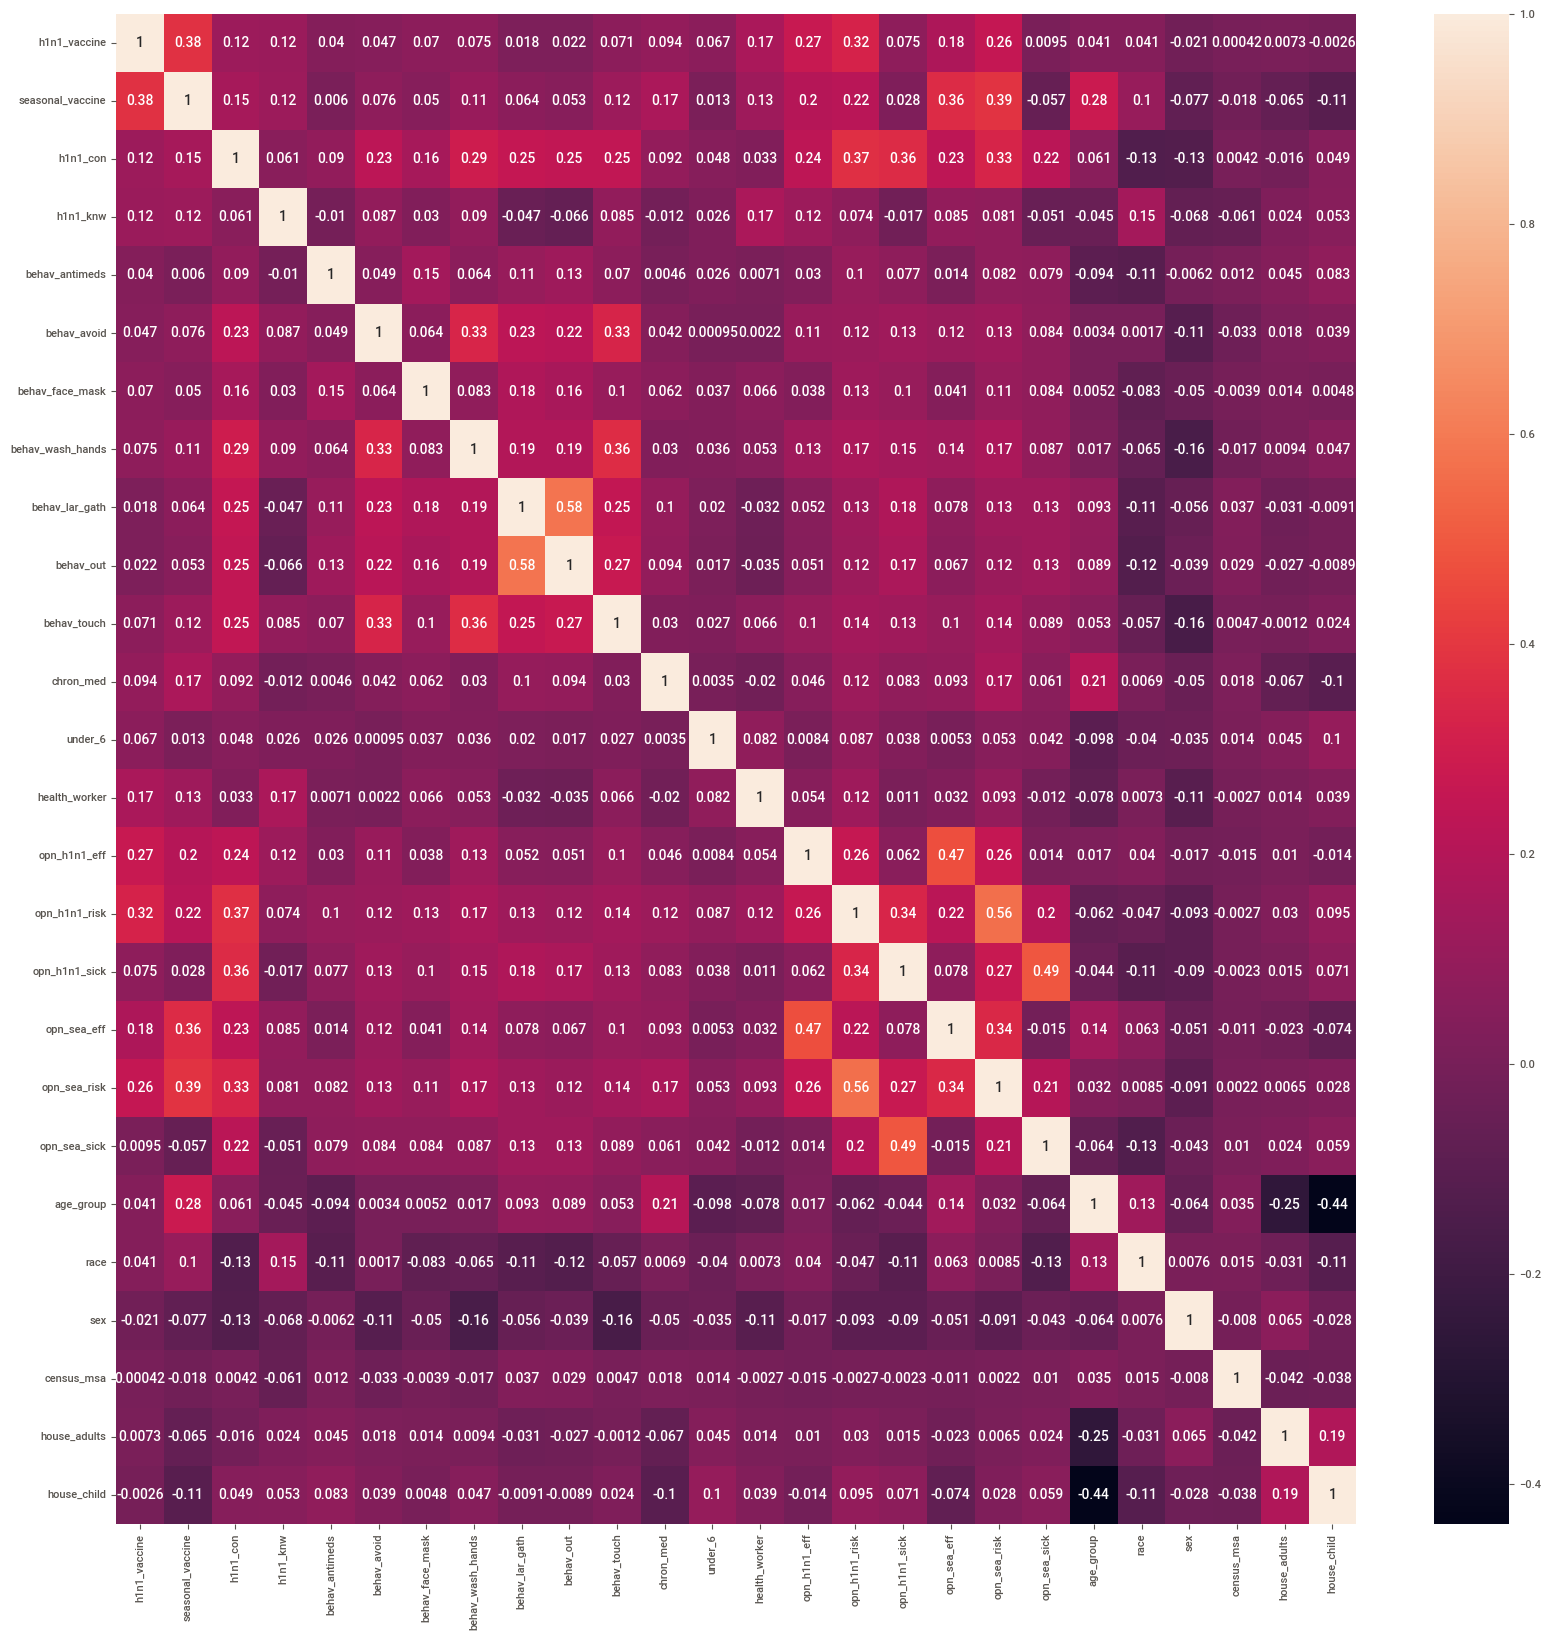

In [102]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

## NOTE
- As the behav_out & behav_lar_gath having correlation, we are dropping behav_out column.
- As the house_chile & age_group having correlation, we are dropping behav_out column.

# Forward feature selection

In [92]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
X = data.drop(['h1n1_vaccine'],axis=1)
y = data.h1n1_vaccine
X = X.astype(int)
knn = KNeighborsClassifier(n_neighbors=2)
knn_feature = KNeighborsClassifier(n_neighbors=2)
sfs = SequentialFeatureSelector(knn,direction='forward')
sfs.fit(X,y)
SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=2))

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=2))

In [93]:
sfs.get_support()

array([ True,  True,  True,  True, False,  True,  True, False, False,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False])

In [94]:
results_h1n1 = pd.Series(sfs.get_support())
results_h1n11 = pd.Series(X.columns)
data_h1n1 = pd.concat([results_h1n1,results_h1n11],axis=1)
data_h1n1

,0,1
0,True,seasonal_vaccine
1,True,h1n1_con
2,True,h1n1_knw
3,True,behav_antimeds
4,False,behav_avoid
5,True,behav_face_mask
6,True,behav_wash_hands
7,False,behav_lar_gath
8,False,behav_out
9,True,behav_touch


## NOTE
- We are dropping following columns for better performamce 
- 'opn_sea_sick', 'age_group', 'census_msa'
- And as we are predicting h1n1 vaccine, also dropping columns 'opn_sea_risk' & 'opn_sea_eff ' 

# 7] Model creation

##   Model for H1N1 Vaccine prediction

In [105]:
data.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_con', 'h1n1_knw',
       'behav_antimeds', 'behav_avoid', 'behav_face_mask', 'behav_wash_hands',
       'behav_lar_gath', 'behav_out', 'behav_touch', 'chron_med', 'under_6',
       'health_worker', 'opn_h1n1_eff', 'opn_h1n1_risk', 'opn_h1n1_sick',
       'opn_sea_eff', 'opn_sea_risk', 'opn_sea_sick', 'age_group', 'race',
       'sex', 'census_msa', 'house_adults', 'house_child'],
      dtype='object')

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

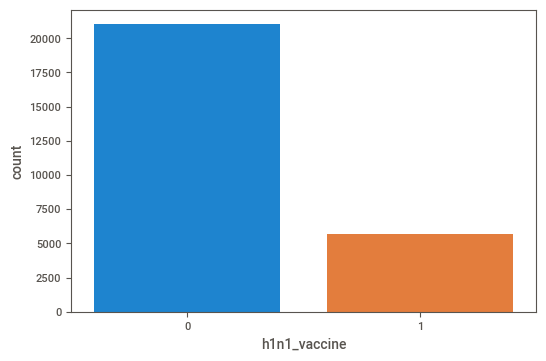

In [104]:
sns.countplot(data['h1n1_vaccine'])

# NOTE
- As the dataset having more count of not getting vaccine than getting the vaccine, data is unbalanced

## So we are performing Under sampling of data

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

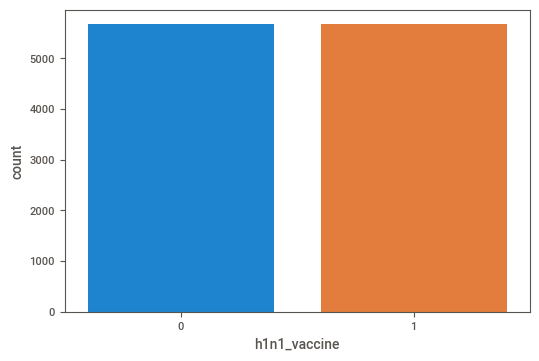

In [311]:
h1n1_vaccine = len(data[data['h1n1_vaccine'] == 1])
no_h1n1_vaccine_indices = data[data.h1n1_vaccine == 0].index
random_indices = np.random.choice(no_h1n1_vaccine_indices,h1n1_vaccine, replace=False)
h1n1_vaccine_indices = data[data.h1n1_vaccine == 1].index
under_sample_indices = np.concatenate([h1n1_vaccine_indices,random_indices])
under_sample = data.loc[under_sample_indices]
sns.countplot(under_sample['h1n1_vaccine'])

## Now the data is seems balanced

In [312]:
# Creating X and y variable
X = under_sample.drop(columns = ['h1n1_vaccine','opn_sea_risk', 'age_group', 'opn_sea_sick','opn_sea_eff','behav_out','house_child'])
y = under_sample['h1n1_vaccine']

In [313]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split( X, y, test_size= 0.2)

# 8] Model Selection

# Let us compare the Different Machine Learning Models

## Random forest :

In [108]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)

In [109]:
print(classification_report(Y_test, Y_prediction))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1142
           1       0.74      0.73      0.73      1128

    accuracy                           0.74      2270
   macro avg       0.74      0.74      0.74      2270
weighted avg       0.74      0.74      0.74      2270



## Logistic Regression :

In [110]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)

In [111]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1142
           1       0.75      0.77      0.76      1128

    accuracy                           0.76      2270
   macro avg       0.76      0.76      0.76      2270
weighted avg       0.76      0.76      0.76      2270



## K Nearest Neighbor :

In [112]:
knn = KNeighborsClassifier(n_neighbors = 2) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)

In [113]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.60      0.85      0.71      1142
           1       0.74      0.44      0.55      1128

    accuracy                           0.65      2270
   macro avg       0.67      0.64      0.63      2270
weighted avg       0.67      0.65      0.63      2270



## Gaussian Naive Bayes :

In [114]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)

In [115]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1142
           1       0.74      0.68      0.71      1128

    accuracy                           0.72      2270
   macro avg       0.72      0.72      0.72      2270
weighted avg       0.72      0.72      0.72      2270



## Support Vector Machine :

In [116]:
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_train, Y_train)
Y_pred = svclassifier.predict(X_test) 
acc_svc = round(svclassifier.score(X_test, Y_test) * 100, 2)

In [117]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1142
           1       0.73      0.79      0.76      1128

    accuracy                           0.75      2270
   macro avg       0.75      0.75      0.75      2270
weighted avg       0.75      0.75      0.75      2270



## Decision Tree :

In [118]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)

In [119]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1142
           1       0.69      0.66      0.67      1128

    accuracy                           0.68      2270
   macro avg       0.68      0.68      0.68      2270
weighted avg       0.68      0.68      0.68      2270



# Gradient Boosting

In [209]:
## importing the model library
from sklearn.ensemble import GradientBoostingClassifier
gbm_h1n1=GradientBoostingClassifier() ## object creation
gbm_h1n1.fit(X_train, Y_train) ## fitting the data
y_gbm=gbm_h1n1.predict(X_test)#predicting the price
acc_gbm_h1n1 = round(gbm_h1n1.score(X_test, Y_test) * 100, 2)

In [121]:
print(classification_report(Y_test, y_gbm))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      1142
           1       0.75      0.76      0.76      1128

    accuracy                           0.76      2270
   macro avg       0.76      0.76      0.76      2270
weighted avg       0.76      0.76      0.76      2270



# XGBoost 

In [122]:
from xgboost import XGBClassifier#importing the model library
xgb_r_h1n1=XGBClassifier() ## object creation
xgb_r_h1n1.fit(X_train, Y_train)# fitting the data
y_hat=xgb_r_h1n1.predict(X_test)#predicting the price
acc_xgb_r_h1n1 = round(xgb_r_h1n1.score(X_test, Y_test) * 100, 2)

In [123]:
print(classification_report(Y_test, y_hat))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1142
           1       0.74      0.75      0.74      1128

    accuracy                           0.74      2270
   macro avg       0.74      0.74      0.74      2270
weighted avg       0.74      0.74      0.74      2270



## ALL SCORES

In [124]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              'Decision Tree','Gradient Boosting','Xgb boost'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
             acc_decision_tree,acc_gbm_h1n1,acc_xgb_r_h1n1]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
75.59,Logistic Regression
75.59,Gradient Boosting
74.85,Support Vector Machines
74.49,Xgb boost
73.96,Random Forest
71.98,Naive Bayes
68.28,Decision Tree
64.54,KNN


# Implementing Logistic Regression Model

In [108]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)

In [109]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1126
           1       0.74      0.78      0.76      1144

    accuracy                           0.75      2270
   macro avg       0.75      0.75      0.75      2270
weighted avg       0.75      0.75      0.75      2270



In [110]:
pd.crosstab(Y_test, Y_pred) # confusion matrix 

col_0,0,1
h1n1_vaccine,,
0,810,316
1,254,890


# 9] Hyperparameter Tuning Logistic Regression Model

In [116]:
from sklearn.model_selection import RandomizedSearchCV

penalty=['none']
C=[1.0]
solver=['saga']
max_iter = [100]

#dictionary for hyperparameters
#random_grid = {'penalty': 'l1','C':C,
          #     'solver': solver, 'max_iter': max_iter}
random_grid = {'penalty': penalty,'C':C,
             'solver': solver, 'max_iter': max_iter}
logreg1 = LogisticRegression()#model

logreg_cv = RandomizedSearchCV(estimator=logreg1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
logreg_cv.fit(X_train, Y_train)##training data on randomsearch cv
logreg_best_params = logreg_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {logreg_best_params})")##printing  best parameters

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best paramters: {'solver': 'saga', 'penalty': 'none', 'max_iter': 100, 'C': 1.0})


# 10] Model Evaluation

In [314]:
logreg2 = LogisticRegression(solver = 'saga',penalty='none',max_iter = 100,C=1.0)#passing best parameter to randomforest
logreg2.fit(X_train,Y_train)#training 
y_predict=logreg2.predict(X_test)#testing

In [103]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1113
           1       0.75      0.79      0.77      1157

    accuracy                           0.76      2270
   macro avg       0.76      0.76      0.76      2270
weighted avg       0.76      0.76      0.76      2270



In [315]:
pd.crosstab(Y_test,y_predict) # confusion matrix 

col_0,0,1
h1n1_vaccine,,
0,831,275
1,269,895


# Plotting ROC AUC curve with Logistic Regression Model

0.8332443932812589


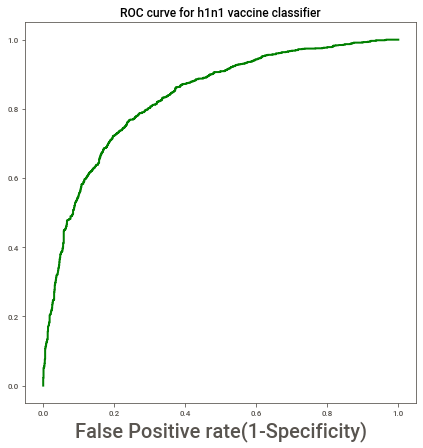

In [316]:
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline
plt.figure(figsize=(7,7))
y_predict_logreg2=logreg2.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(Y_test,y_predict_logreg2)
plt.title('ROC curve for h1n1 vaccine classifier')
plt.xlabel('False Positive rate(1-Specificity)',fontsize=20)
plt.plot(fpr,tpr,color='green',lw=2)
print(roc_auc_score(Y_test,y_predict_logreg2))
plt.show()

In [317]:
print(roc_auc_score(Y_test,y_predict_logreg2))

0.8332443932812589


# Conclusion
- For h1n1 vaccine prediction, we are able to predict 76% Accurte result.
- For H1N1 vaccine prediction,F1 score for test data is 76%.
- The ROC AUC Score is 0.8332, which shows that model is good Classifier.

#  11] Model for Seasonal Vaccine prediction

<AxesSubplot:xlabel='seasonal_vaccine', ylabel='count'>

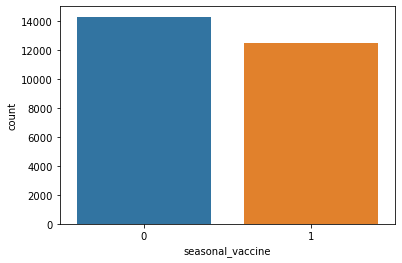

In [54]:
sns.countplot(data['seasonal_vaccine'])

# 12] Feature Selection

# Forward Feature Selection

In [96]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
X = data.drop(['seasonal_vaccine'],axis=1)
y = data.seasonal_vaccine
X = X.astype(int)
knn = KNeighborsClassifier(n_neighbors=2)
knn_feature = KNeighborsClassifier(n_neighbors=2)
sfs = SequentialFeatureSelector(knn,direction='forward')
sfs.fit(X,y)
SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=2))

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=2))

In [98]:
X.columns

Index(['h1n1_vaccine', 'h1n1_con', 'h1n1_knw', 'behav_antimeds', 'behav_avoid',
       'behav_face_mask', 'behav_wash_hands', 'behav_lar_gath', 'behav_out',
       'behav_touch', 'chron_med', 'under_6', 'health_worker', 'opn_h1n1_eff',
       'opn_h1n1_risk', 'opn_h1n1_sick', 'opn_sea_eff', 'opn_sea_risk',
       'opn_sea_sick', 'age_group', 'race', 'sex', 'census_msa',
       'house_adults', 'house_child'],
      dtype='object')

In [97]:
sfs.get_support()

array([ True, False, False,  True, False, False,  True, False,  True,
       False, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False, False, False])

In [199]:
results = pd.Series(sfs.get_support())
results1 = pd.Series(X.columns)
data1 = pd.concat([results,results1],axis=1)
data1

,0,1
0,True,h1n1_vaccine
1,False,h1n1_con
2,False,h1n1_knw
3,True,behav_antimeds
4,False,behav_avoid
5,False,behav_face_mask
6,True,behav_wash_hands
7,False,behav_lar_gath
8,True,behav_out
9,False,behav_touch


# 13] Model selection for seasonal vaccine

# Let us compare the Different Machine Learning Models

In [114]:
# Creating X and y variable
X1 = data.drop(columns = ['seasonal_vaccine','h1n1_con','behav_avoid', 'behav_face_mask','behav_lar_gath','behav_touch', 'chron_med','opn_h1n1_eff', 'opn_h1n1_risk','sex', 'census_msa', 'house_adults', 'house_child'])
y1 = data['seasonal_vaccine']

In [115]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test = train_test_split( X1, y1, test_size= 0.2)

In [117]:
from imblearn.over_sampling import SMOTE
smote = SMOTE() ## object creation

In [118]:
X_train_smote, Y_train_smote = smote.fit_resample(X1_train,
                                                  Y1_train)

In [119]:
from collections import Counter
print("Actual Classes",Counter(Y1_train))
print("SMOTE Classes",Counter(Y_train_smote))

Actual Classes Counter({0: 11486, 1: 9879})
SMOTE Classes Counter({1: 11486, 0: 11486})


## Random forest :

In [120]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
random_forest_sea = RandomForestClassifier(n_estimators=100)
random_forest_sea.fit(X_train_smote, Y_train_smote)
Y1_prediction = random_forest_sea.predict(X1_test)
random_forest_sea.score(X_train_smote, Y_train_smote)
acc_random_forest_sea = round(random_forest_sea.score(X1_test, Y1_test) * 100, 2)

In [143]:
print(classification_report(Y1_test, Y1_prediction))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      2876
           1       0.73      0.74      0.74      2466

    accuracy                           0.75      5342
   macro avg       0.75      0.75      0.75      5342
weighted avg       0.75      0.75      0.75      5342



## Logistic Regression :

In [121]:
logreg_sea = LogisticRegression()
logreg_sea.fit(X_train_smote, Y_train_smote)
Y1_pred_log = logreg_sea.predict(X1_test)
acc_log_sea = round(logreg_sea.score(X1_test, Y1_test) * 100, 2)

In [130]:
print(classification_report(Y1_test, Y1_pred_log))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      2876
           1       0.75      0.76      0.75      2466

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



## K Nearest Neighbor :

In [122]:
knn_sea = KNeighborsClassifier(n_neighbors = 2) 
knn_sea.fit(X_train_smote, Y_train_smote)  
Y1_pred_knn = knn_sea.predict(X1_test)  
acc_knn_sea = round(knn_sea.score(X1_test, Y1_test) * 100, 2)

In [126]:
print(classification_report(Y1_test, Y1_pred_knn))

              precision    recall  f1-score   support

           0       0.66      0.85      0.75      2876
           1       0.74      0.50      0.59      2466

    accuracy                           0.69      5342
   macro avg       0.70      0.67      0.67      5342
weighted avg       0.70      0.69      0.68      5342



## Gaussian Naive Bayes :

In [123]:
gaussian_sea = GaussianNB() 
gaussian_sea.fit(X_train_smote, Y_train_smote)  
Y1_pred_guassian = gaussian_sea.predict(X1_test)  
acc_gaussian_sea = round(gaussian_sea.score(X1_test, Y1_test) * 100, 2)

In [128]:
print(classification_report(Y1_test, Y1_pred_guassian))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      2876
           1       0.73      0.70      0.72      2466

    accuracy                           0.75      5342
   macro avg       0.74      0.74      0.74      5342
weighted avg       0.75      0.75      0.75      5342



## Support Vector Machine :

In [125]:
svclassifier_sea = SVC() ## base model with default parameters
svclassifier_sea.fit(X1_train, Y1_train)
Y1_pred_SVC = svclassifier_sea.predict(X1_test) 
acc_svc_sea = round(svclassifier_sea.score(X1_test, Y1_test) * 100, 2)

In [116]:
print(classification_report(Y1_test, Y1_pred_SVC))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      2876
           1       0.77      0.74      0.75      2466

    accuracy                           0.78      5342
   macro avg       0.78      0.77      0.77      5342
weighted avg       0.78      0.78      0.78      5342



## Decision Tree :

In [126]:
decision_tree_sea = DecisionTreeClassifier() 
decision_tree_sea.fit(X_train_smote, Y_train_smote)  
Y1_pred_dt = decision_tree_sea.predict(X1_test)  
acc_decision_tree_sea = round(decision_tree_sea.score(X1_test, Y1_test) * 100, 2)

In [132]:
print(classification_report(Y1_test, Y1_pred_dt))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      2876
           1       0.70      0.68      0.69      2466

    accuracy                           0.72      5342
   macro avg       0.71      0.71      0.71      5342
weighted avg       0.72      0.72      0.72      5342



# Gradient Boosting 

In [127]:
## importing the model library
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(X_train_smote, Y_train_smote) ## fitting the data
y_gbm=gbm.predict(X1_test)#predicting the price
acc_gbm_sea = round(gbm.score(X1_test, Y1_test) * 100, 2)

In [106]:
print(classification_report(Y1_test, y_gbm))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2909
           1       0.77      0.77      0.77      2433

    accuracy                           0.79      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.79      0.79      0.79      5342



In [137]:
pd.crosstab(Y1_test, y_gbm) # confusion matrix 

col_0,0,1
seasonal_vaccine,,
0,2254,622
1,543,1923


# XGBoost

In [128]:
from xgboost import XGBClassifier#importing the model library
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(X_train_smote, Y_train_smote)# fitting the data
y_hat=xgb_r.predict(X1_test)#predicting the price
acc_xgb_r_sea = round(xgb_r.score(X1_test, Y1_test) * 100, 2)

In [138]:
print(classification_report(Y1_test, y_hat))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2876
           1       0.75      0.75      0.75      2466

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



In [139]:
pd.crosstab(Y1_test, y_hat) # confusion matrix 

col_0,0,1
seasonal_vaccine,,
0,2256,620
1,624,1842


## ALL SCORES

In [130]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              'Decision Tree','Gradient Boosting','XGBoost'],
    'Score': [acc_svc_sea, acc_knn_sea, acc_log_sea, 
              acc_random_forest_sea, acc_gaussian_sea, 
             acc_decision_tree_sea,acc_gbm_sea,acc_xgb_r_sea] })
result_df1 = results.sort_values(by='Score', ascending=False)
result_df1 = result_df1.set_index('Score')
result_df1.head(9)

,Model
Score,
77.97,Gradient Boosting
77.87,XGBoost
77.52,Support Vector Machines
77.50,Logistic Regression
74.73,Naive Bayes
74.63,Random Forest
72.65,Decision Tree
68.94,KNN


# Gradient Boosting giving highest score

# Gradient  Boostin Implementaion

In [131]:
## importing the model library
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(X_train_smote, Y_train_smote) ## fitting the data
y_gbm=gbm.predict(X1_test)#predicting the price
acc_gbm_sea = round(gbm.score(X1_test, Y1_test) * 100, 2)

In [132]:
print(classification_report(Y1_test, y_gbm))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      2786
           1       0.77      0.78      0.77      2556

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



In [133]:
pd.crosstab(Y1_test, y_hat) # confusion matrix 

col_0,0,1
seasonal_vaccine,,
0,2194,592
1,590,1966


# 14] Hyperparameter Tuning Gradient Boosting Model

In [159]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150]}

GB=GradientBoostingClassifier()
rcv= RandomizedSearchCV(estimator=GB, scoring='f1',param_distributions=param_grid, n_iter=10, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(X_train_smote, Y_train_smote)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best paramters: {'n_estimators': 80, 'max_depth': 5, 'learning_rate': 0.2})


# 14] Model Evalutaion

In [134]:
GB2=GradientBoostingClassifier(n_estimators=80, max_depth=5, learning_rate=0.2)
GB2.fit(X_train_smote, Y_train_smote)#training 
y_predict_GB2=GB2.predict(X1_test)#testing

In [135]:
print(classification_report(y_predict_GB2,Y1_test))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2788
           1       0.77      0.77      0.77      2554

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



In [136]:
pd.crosstab(y_predict_GB2,Y1_test) # confusion matrix 

seasonal_vaccine,0,1
row_0,,
0,2195,593
1,591,1963


# ROC AUC Curve

0.8538509111621151


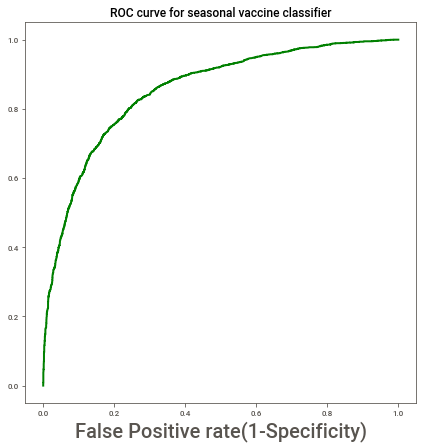

In [141]:
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline
plt.figure(figsize=(7,7))
y_predict_GB2=GB2.predict_proba(X1_test)[:,1]
fpr,tpr,thresholds=roc_curve(Y1_test,y_predict_GB2)
plt.title('ROC curve for seasonal vaccine classifier')
plt.xlabel('False Positive rate(1-Specificity)',fontsize=20)
plt.plot(fpr,tpr,color='green',lw=2)
print(roc_auc_score(Y1_test,y_predict_GB2))
plt.show()

In [142]:
print(roc_auc_score(Y1_test,y_predict_GB2))

0.8538509111621151


# Conclusion
- For seasonal vaccine prediction, we are able to predict 78% Accurate result.
- The ROC AUC Score is 0.8538, which shows that model is good Classifier.

# 15] Final Conclusion

# For h1n1 vaccine
- For h1n1 vaccine prediction, we are able to predict 76% Accurte result.
- For H1N1 vaccine prediction,F1 score for test data is 76%.
- The ROC AUC Score is 0.8332, which shows that model is good Classifier.

# For Seasonal vaccine
- For seasonal vaccine prediction, we are able to predict 78% Accurate result.
- For seasonal vaccine prediction,F1 score for test data is 78%.
- The ROC AUC Score is 0.8538, which shows that model is good Classifier.